<a href="https://colab.research.google.com/github/ENKI0311/UT-Austin_Coursework/blob/main/Final_ETMT_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Users Churn Prediction!

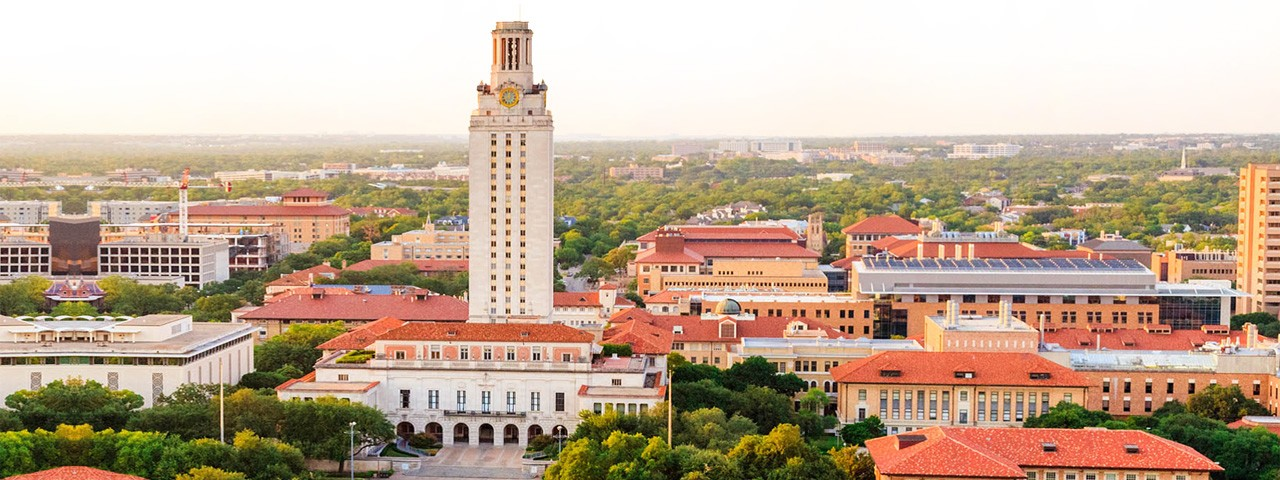

# By: John Chilton

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


In [ ]:
!pip install nb-black

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip install -U scikit-learn imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 19.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
!pip uninstall -y imbalanced-learn
!pip install imbalanced-learn


Found existing installation: imbalanced-learn 0.11.0
Uninstalling imbalanced-learn-0.11.0:
  Successfully uninstalled imbalanced-learn-0.11.0
  Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)


In [ ]:
!pip install xgboost


## Importing necessary libraries

In [ ]:
# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score,f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
#Loading the Drive from Google
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/lab_mount/BankChurners.csv')

## Data Overview

- Observations
- Sanity checks

In [ ]:
# Loading the first ten rows of the data
df.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.000,1247,2763.000,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51,M,4,NaN,Married,$120K +,Gold,46,6,1,3,34516.000,2264,32252.000,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32,M,0,High School,NaN,$60K - $80K,Silver,27,2,2,2,29081.000,1396,27685.000,2.204,1538,36,0.714,0.048
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.000,2517,19835.000,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.000,1677,9979.000,1.524,1441,32,0.882,0.144


In [ ]:
# Loading the last 10 rows of the data
df.tail(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10117,712503408,Existing Customer,57,M,2,Graduate,Married,$80K - $120K,Blue,40,6,3,4,17925.000,1909,16016.000,0.712,17498,111,0.820,0.106
10118,713755458,Attrited Customer,50,M,1,NaN,NaN,$80K - $120K,Blue,36,6,3,4,9959.000,952,9007.000,0.825,10310,63,1.100,0.096
10119,716893683,Attrited Customer,55,F,3,Uneducated,Single,abc,Blue,47,4,3,3,14657.000,2517,12140.000,0.166,6009,53,0.514,0.172
10120,710841183,Existing Customer,54,M,1,High School,Single,$60K - $80K,Blue,34,5,2,0,13940.000,2109,11831.000,0.660,15577,114,0.754,0.151
10121,713899383,Existing Customer,56,F,1,Graduate,Single,Less than $40K,Blue,50,4,1,4,3688.000,606,3082.000,0.570,14596,120,0.791,0.164
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


In [ ]:
# Checking the shape of the data
df.shape

(10127, 21)

In [ ]:
# Checking the information of the data
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
# Checking the transverse of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


In [ ]:
# Checking for missing values
df.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [ ]:
# Looking for any duplications in the data
df.duplicated().sum()

0

In [ ]:
# Checking the mean of the data
df.mean()

CLIENTNUM                  739177606.334
Customer_Age                      46.326
Dependent_count                    2.346
Months_on_book                    35.928
Total_Relationship_Count           3.813
Months_Inactive_12_mon             2.341
Contacts_Count_12_mon              2.455
Credit_Limit                    8631.954
Total_Revolving_Bal             1162.814
Avg_Open_To_Buy                 7469.140
Total_Amt_Chng_Q4_Q1               0.760
Total_Trans_Amt                 4404.086
Total_Trans_Ct                    64.859
Total_Ct_Chng_Q4_Q1                0.712
Avg_Utilization_Ratio              0.275
dtype: float64

In [ ]:
# Checking the mode of the data
df.mode()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,708082083,Existing Customer,44.000,F,3.000,Graduate,Married,Less than $40K,Blue,36.000,3.000,3.000,3.000,34516.000,0.000,1438.300,0.791,4253.000,81.000,0.667,0.000
1,708083283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4509.000,NaN,NaN,NaN
2,708084558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,708085458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,708086958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,828288333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10123,828291858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10124,828294933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10125,828298908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Checking the standard deviation of the data
df.std()

CLIENTNUM                  36903783.450
Customer_Age                      8.017
Dependent_count                   1.299
Months_on_book                    7.986
Total_Relationship_Count          1.554
Months_Inactive_12_mon            1.011
Contacts_Count_12_mon             1.106
Credit_Limit                   9088.777
Total_Revolving_Bal             814.987
Avg_Open_To_Buy                9090.685
Total_Amt_Chng_Q4_Q1              0.219
Total_Trans_Amt                3397.129
Total_Trans_Ct                   23.473
Total_Ct_Chng_Q4_Q1               0.238
Avg_Utilization_Ratio             0.276
dtype: float64

In [ ]:
# Checking the data in the column Education_Level
df['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', nan, 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [ ]:
# Checking the data in the column Marital_status
df['Marital_Status'].unique()

array(['Married', 'Single', nan, 'Divorced'], dtype=object)

In [ ]:
# Backup the original DataFrame
df_backup = df.copy()

In [ ]:
#  Checking the summary of the categorical features in the dataset
df.describe(include=["object"]).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [ ]:
# Looping through each column in the DataFrame that has an object data type
for i in df.describe(include=["object"]).columns:
    # Printing the name of the column
    print("Unique values in", i, "are :")
    # Printing the count of unique values in the column
    print(df[i].value_counts())
    # Printing a separator line of asterisks for better readability
    print("*" * 50);

Unique values in Attrition_Flag are :
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
**************************************************
Unique values in Gender are :
F    5358
M    4769
Name: Gender, dtype: int64
**************************************************
Unique values in Education_Level are :
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
**************************************************
Unique values in Marital_Status are :
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
**************************************************
Unique values in Income_Category are :
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
**************************************************

In [ ]:
# Removing the CLIENTNUM column
df.drop(["CLIENTNUM"], axis=1, inplace=True)

In [ ]:
# Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
df["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
df["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

`Customer_Age`

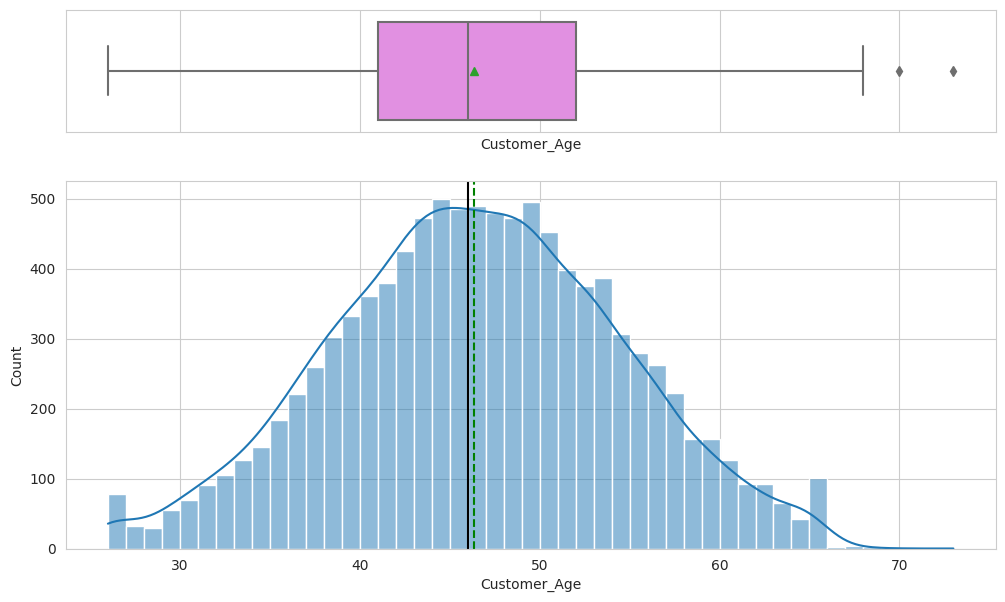

In [ ]:
# Histogram and Boxplot of Customer_Age
histogram_boxplot(df, "Customer_Age", kde=True);

`Months_on_book`

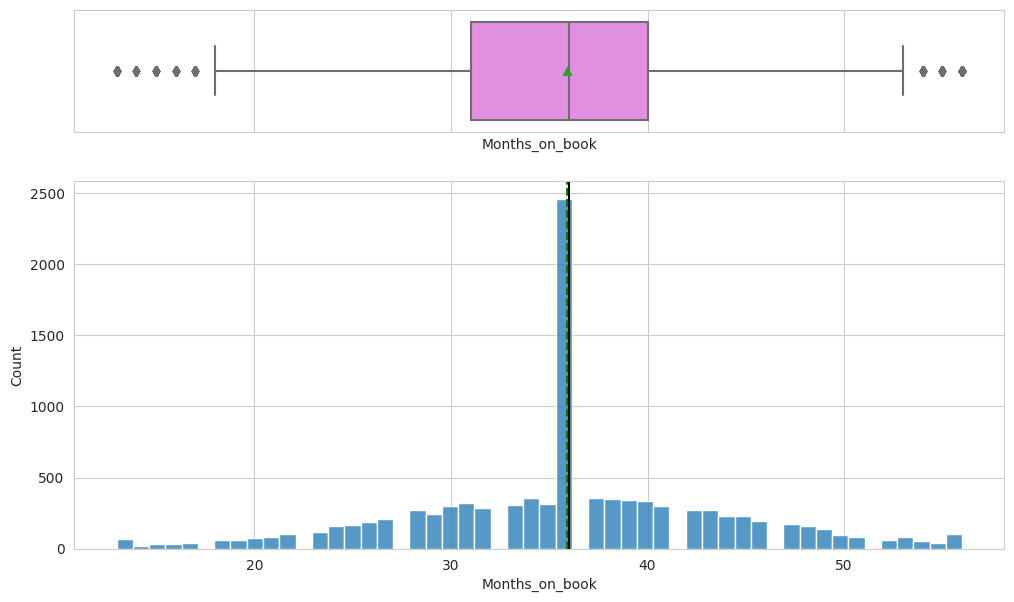

In [ ]:
# Histogram and Boxplot of Months_on_book
histogram_boxplot(df, "Months_on_book");

`Credit_Limit`

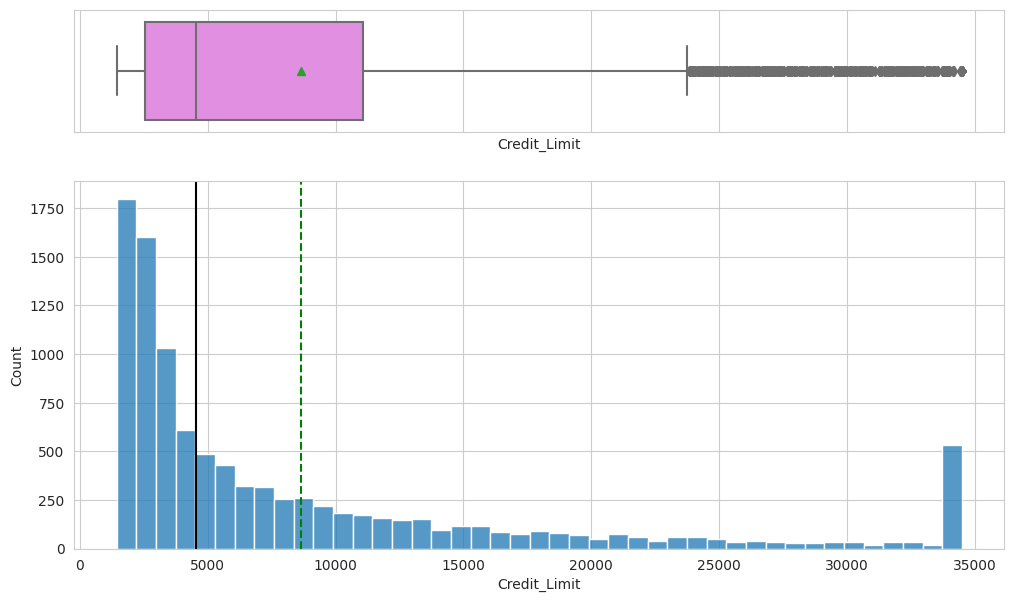

In [ ]:
# Histogram and Boxplot of Credit_Limit
histogram_boxplot(df, "Credit_Limit");

`Total_Revolving_Bal`

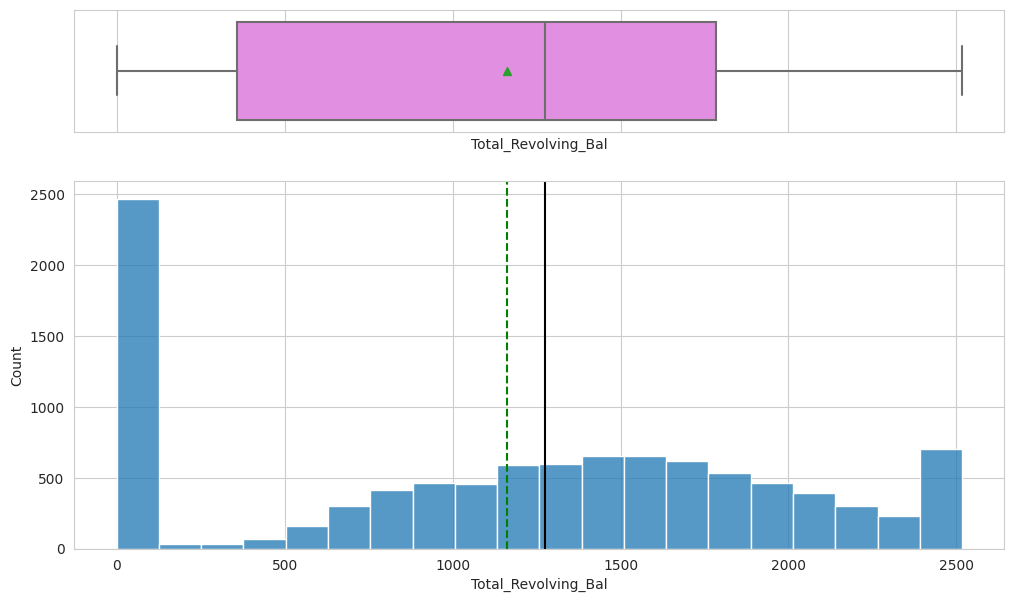

In [ ]:
# Histogram and Boxplot of Total_Revolving_Bal
histogram_boxplot(df, "Total_Revolving_Bal");

`Avg_Open_To_Buy`

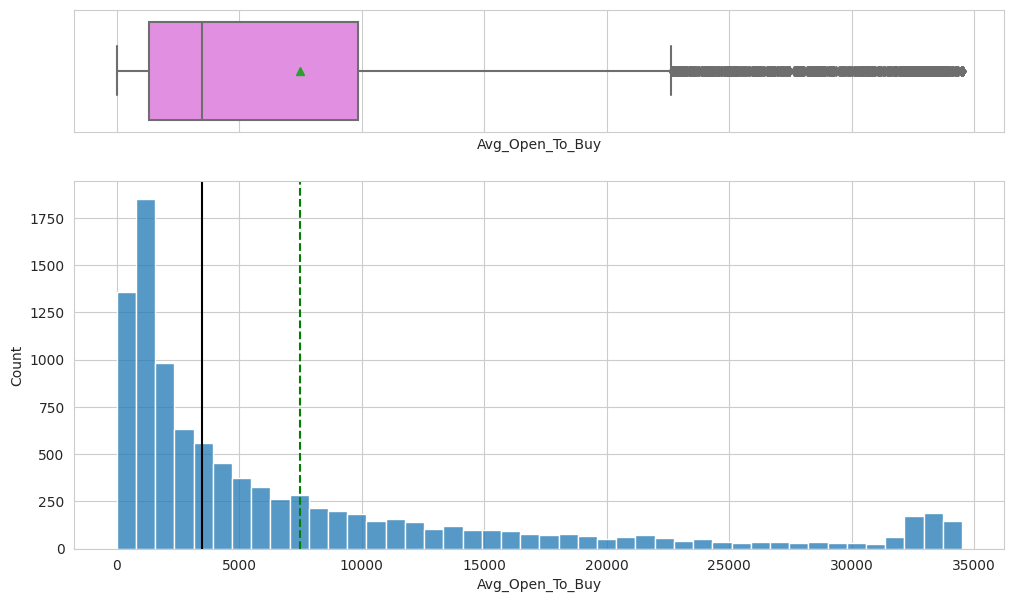

In [ ]:
# Histogram and Bpxplot of Avg_Open_To_Buy
histogram_boxplot(df, "Avg_Open_To_Buy");

`Total_Trans_Ct`

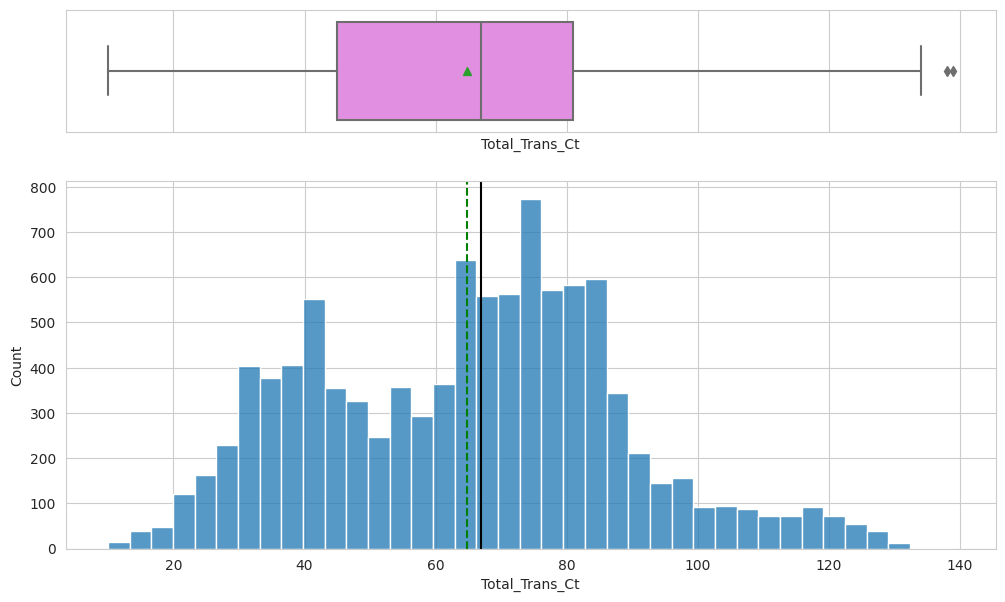

In [ ]:
# Histogram and Boxplot of Total_Trans_Ct
histogram_boxplot(df, "Total_Trans_Ct");

`Total_Amt_Chng_Q4_Q1`

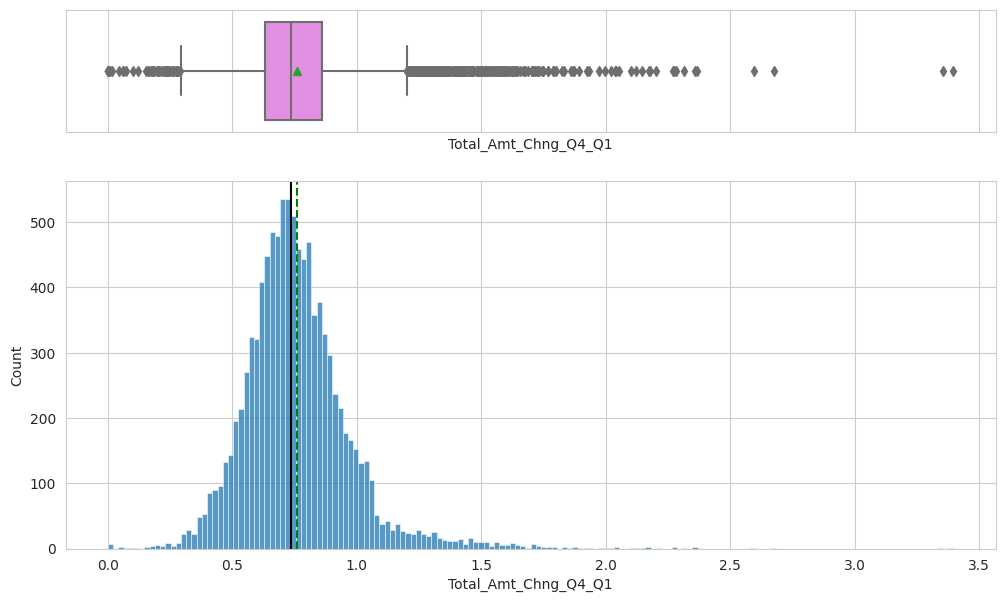

In [ ]:
# Histogram and Boxplot of Total_Amt_Chng_Q4_Q1
histogram_boxplot(df, "Total_Amt_Chng_Q4_Q1");

**Let's see total transaction amount distributed**

`Total_Trans_Amt`

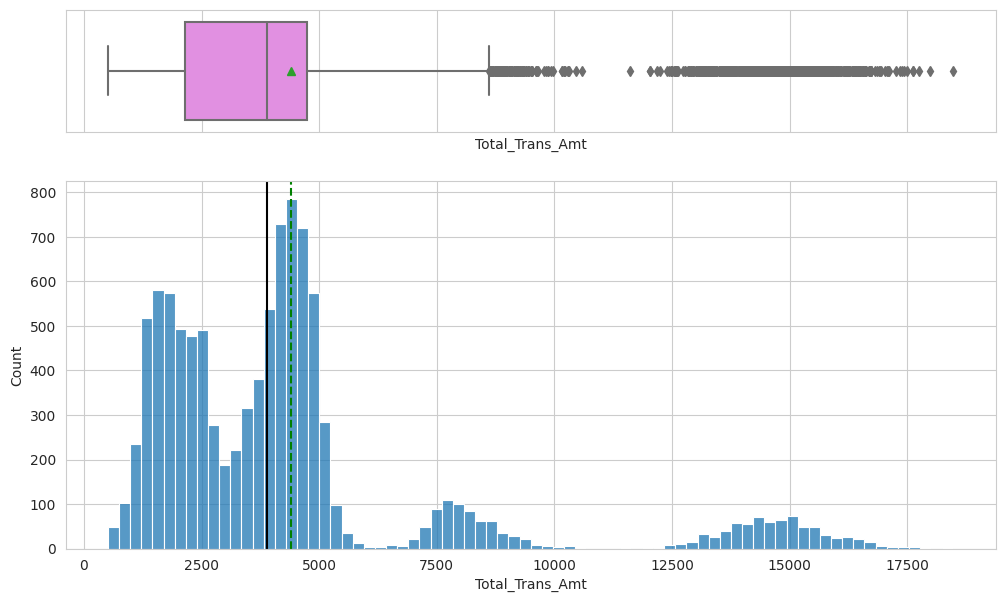

In [ ]:
# Histogram and Boxplot of Total_Trans_Amt
histogram_boxplot(df, "Total_Trans_Amt");

`Total_Ct_Chng_Q4_Q1`

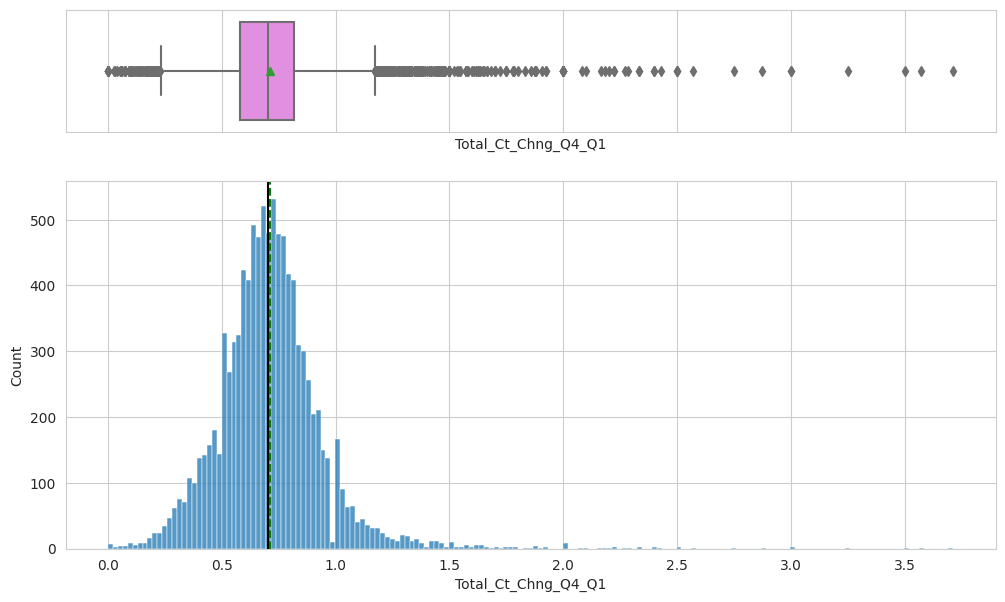

In [ ]:
# Histogram and Boxplot of Total_Ct_Chng_Q4_Q1
histogram_boxplot(df, "Total_Ct_Chng_Q4_Q1");

`Avg_Utilization_Ratio`

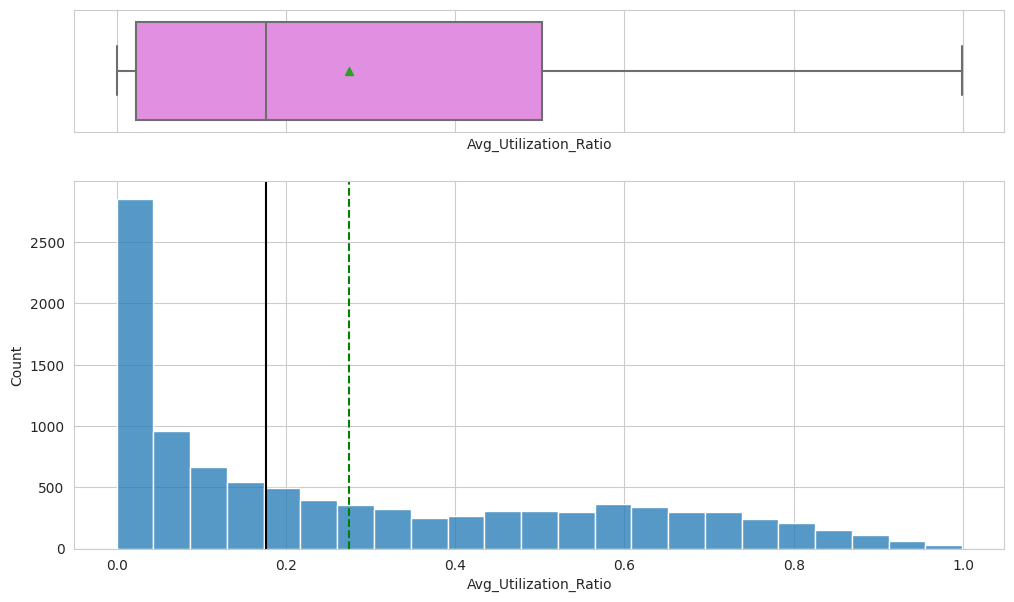

In [ ]:
# Histogram and Boxplot of Avg_Utilization_Ration
histogram_boxplot(df, "Avg_Utilization_Ratio");

`Dependent_count`

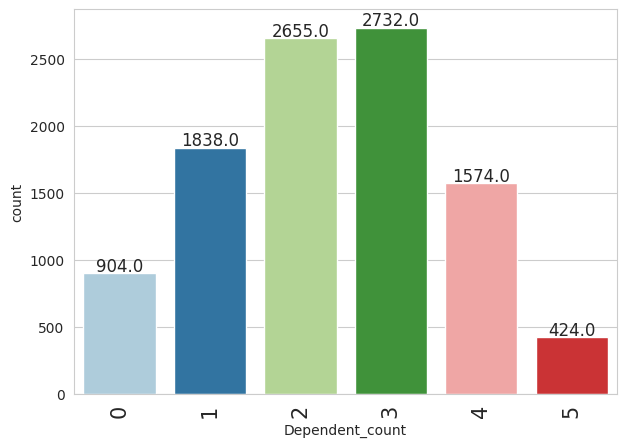

In [ ]:
# Labeled Barplot of Dependent_count
labeled_barplot(df, "Dependent_count");

`Total_Relationship_Count`

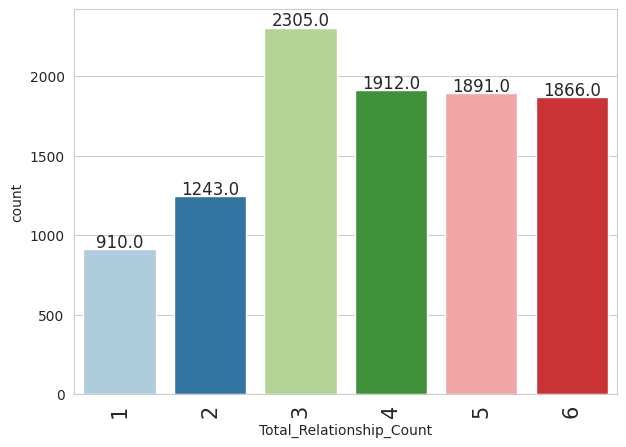

In [ ]:
# Labeled Barplot of Total_Relationship_Count
labeled_barplot(df, "Total_Relationship_Count");

`Months_Inactive_12_mon`

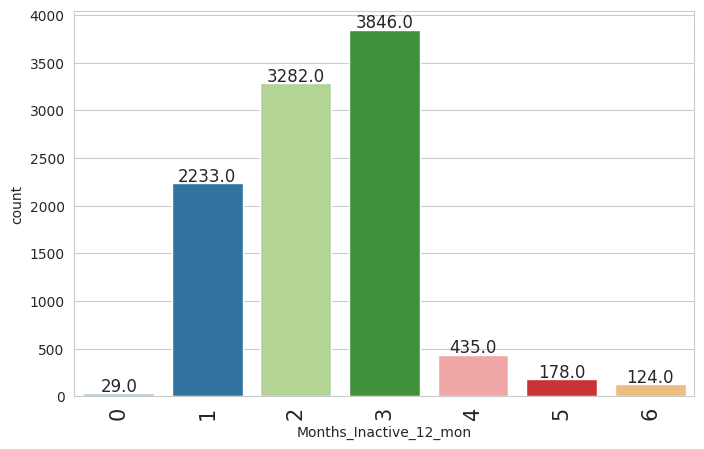

In [ ]:
# Labeled Barplot of Months_Inactive_12_mon
labeled_barplot(df, "Months_Inactive_12_mon");

`Contacts_Count_12_mon`

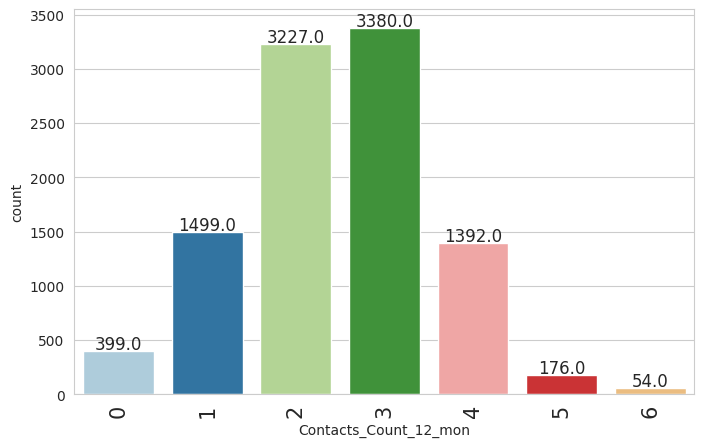

In [ ]:
# Labeled Barplot of Contacts_Count_12_mon
labeled_barplot(df, "Contacts_Count_12_mon");

`Gender`

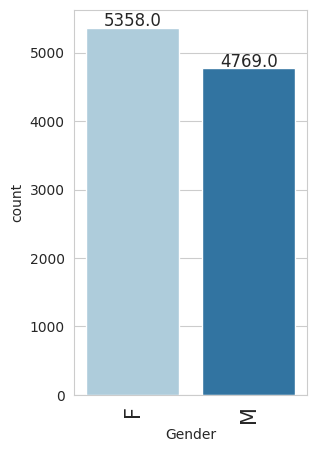

In [ ]:
# Labeled Barplot of Gender
labeled_barplot(df, "Gender");

**Let's see the distribution of the level of education of customers**

`Education_Level`

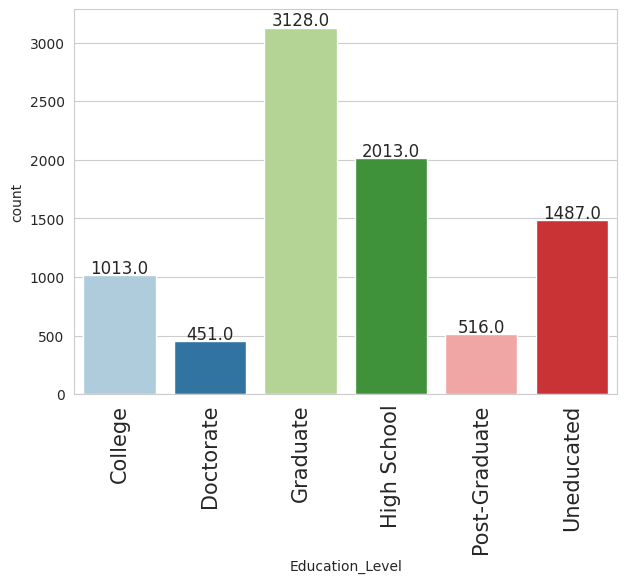

In [ ]:
# Labeled Barplot of Education_Level
labeled_barplot(df, "Education_Level");

`Marital_Status`

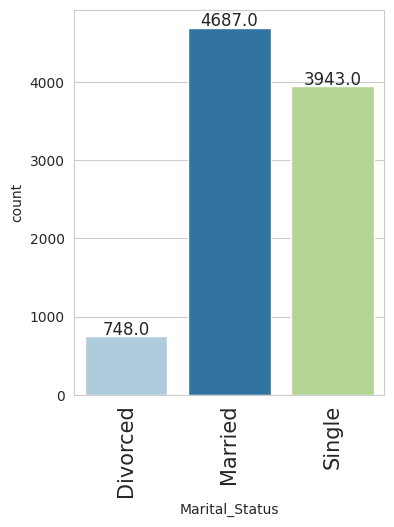

In [ ]:
# Labeled Barplot of Marital_Status
labeled_barplot(df, "Marital_Status");

**Let's see the distribution of the level of income of customers**

`Income_Category`

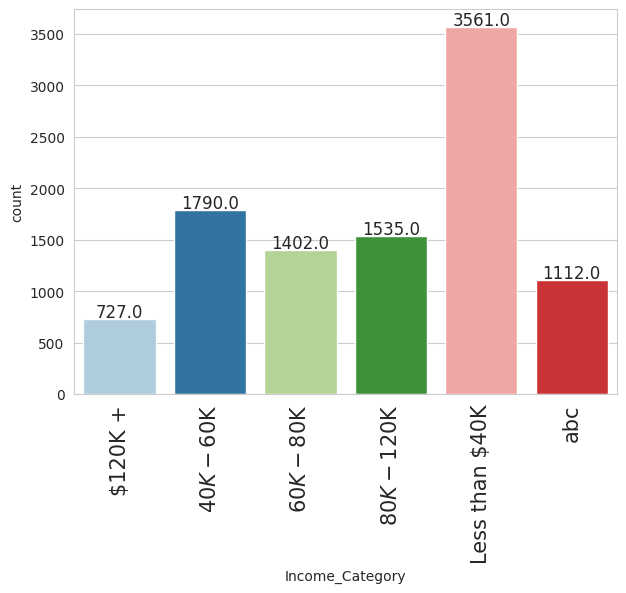

In [ ]:
# Labeled Barplot of Income_Category
labeled_barplot(df, "Income_Category");

`Card_Category`

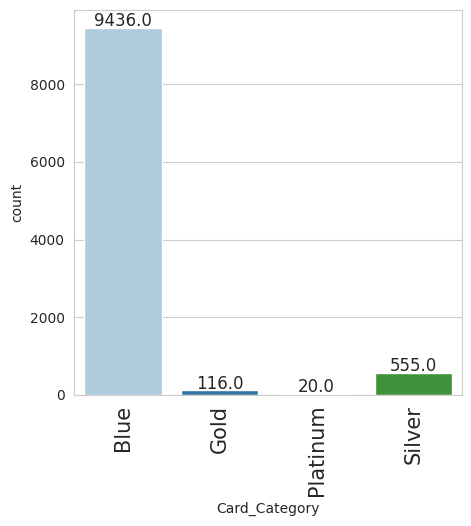

In [ ]:
# Labeled Barplot of Card_category
labeled_barplot(df, "Card_Category");

`Attrition_Flag`

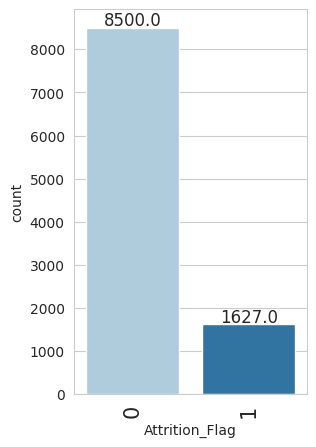

In [ ]:
# Labeled Barplot of Attrition_flag
labeled_barplot(df, "Attrition_Flag");

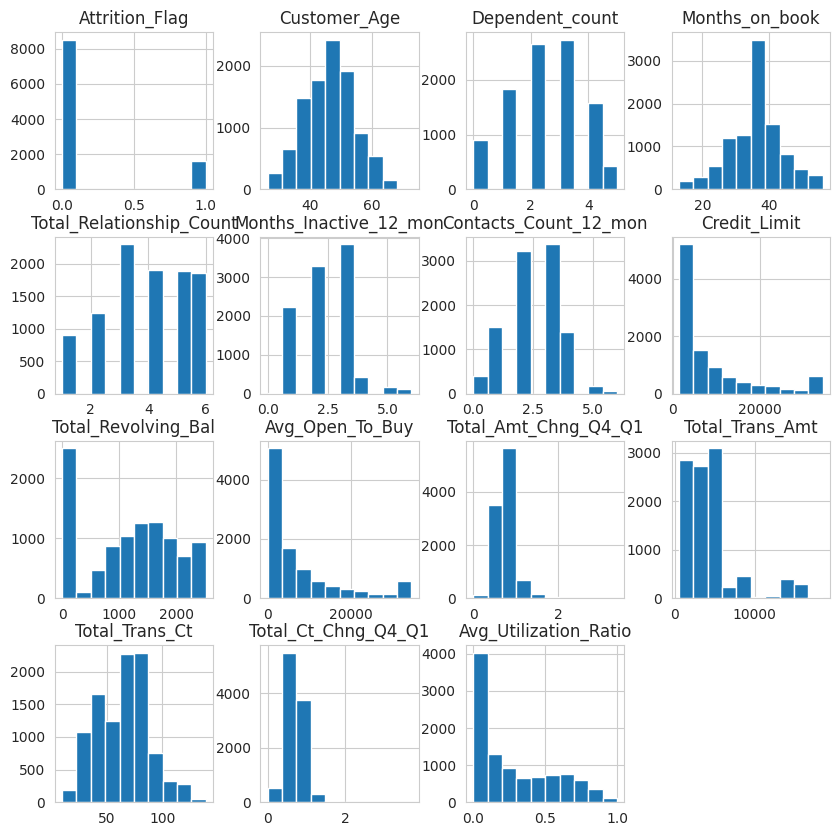

In [ ]:
# Histogram of the data
df.hist(figsize=(10, 10))
plt.show();

### Bivariate Distributions

**Let's see the attributes that have a strong correlation with each other**

**Correlation Check**

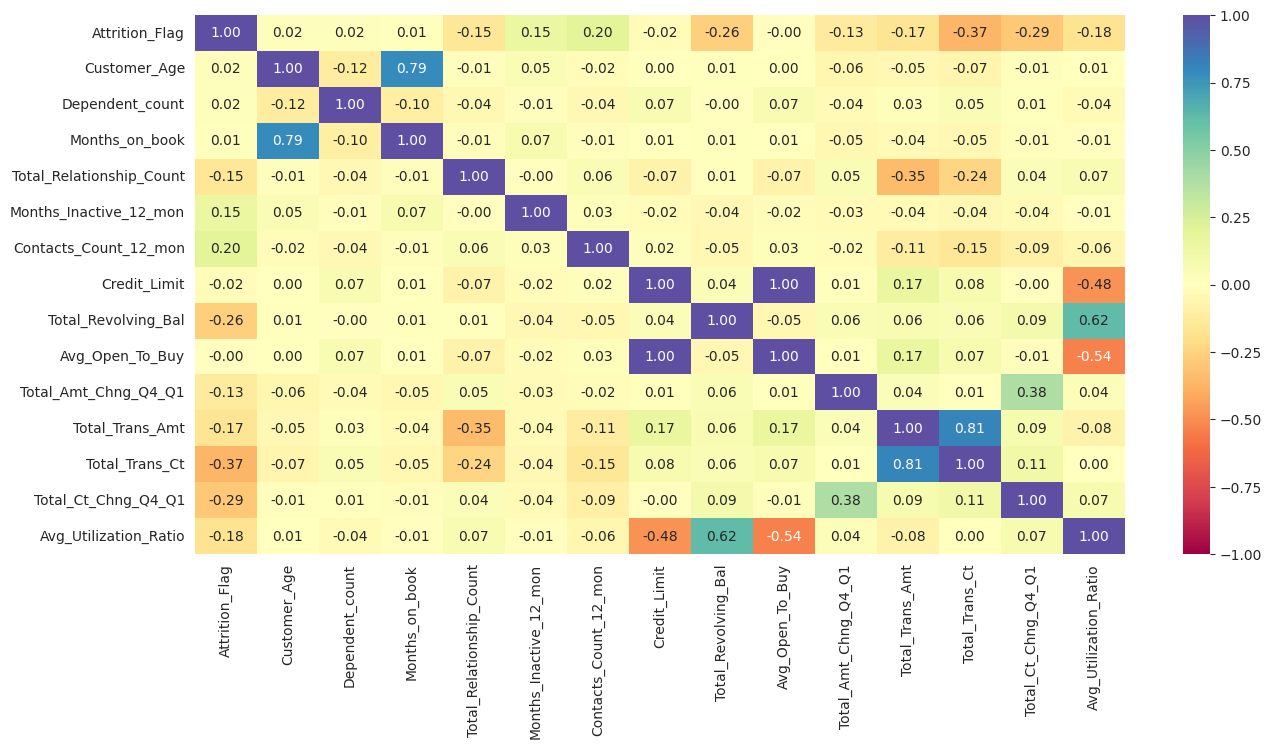

In [ ]:
# Heatmap of the data set to look for corrilations in the data.
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show();

`Attrition_Flag vs Gender`

Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


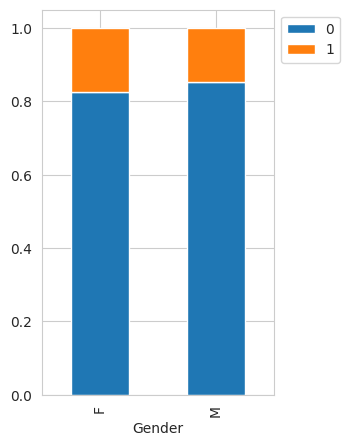

In [ ]:
# Stacked Barplot of Attrition_flag vs Gender
stacked_barplot(df, "Gender", "Attrition_Flag");

`Attrition_Flag vs Marital_Status`

Attrition_Flag     0     1   All
Marital_Status                  
All             7880  1498  9378
Married         3978   709  4687
Single          3275   668  3943
Divorced         627   121   748
------------------------------------------------------------------------------------------------------------------------


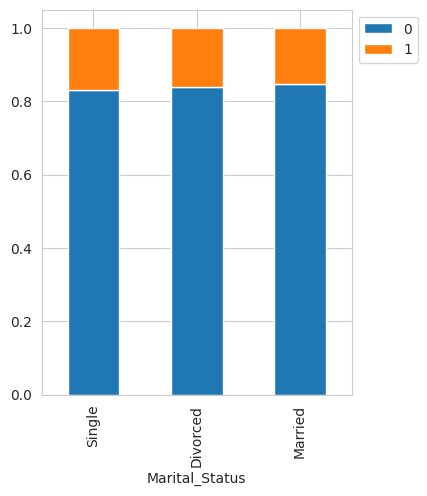

In [ ]:
# Stacked Barplot of Attrition_Flag vs Marital_Status
stacked_barplot(df, "Marital_Status", "Attrition_Flag");

`Attrition_Flag vs Education_Level`

Attrition_Flag      0     1   All
Education_Level                  
All              7237  1371  8608
Graduate         2641   487  3128
High School      1707   306  2013
Uneducated       1250   237  1487
College           859   154  1013
Doctorate         356    95   451
Post-Graduate     424    92   516
------------------------------------------------------------------------------------------------------------------------


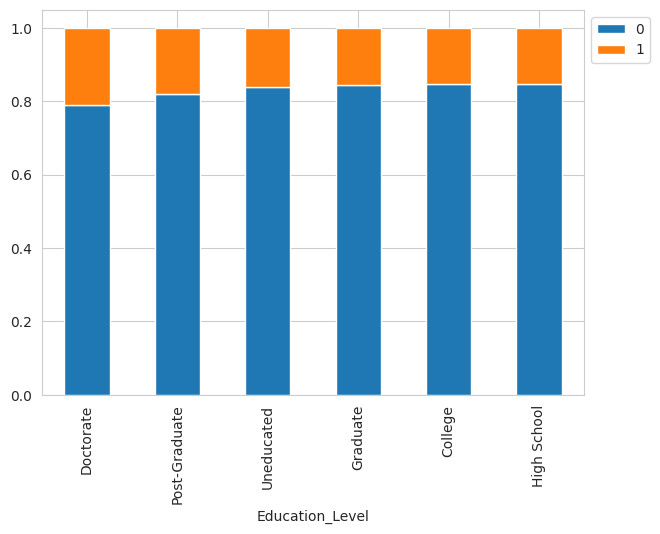

In [ ]:
# Stacked Barplot of Attrition_Flag vs Education_Level
stacked_barplot(df, "Education_Level", "Attrition_Flag");

`Attrition_Flag vs Income_Category`

Attrition_Flag      0     1    All
Income_Category                   
All              8500  1627  10127
Less than $40K   2949   612   3561
$40K - $60K      1519   271   1790
$80K - $120K     1293   242   1535
$60K - $80K      1213   189   1402
abc               925   187   1112
$120K +           601   126    727
------------------------------------------------------------------------------------------------------------------------


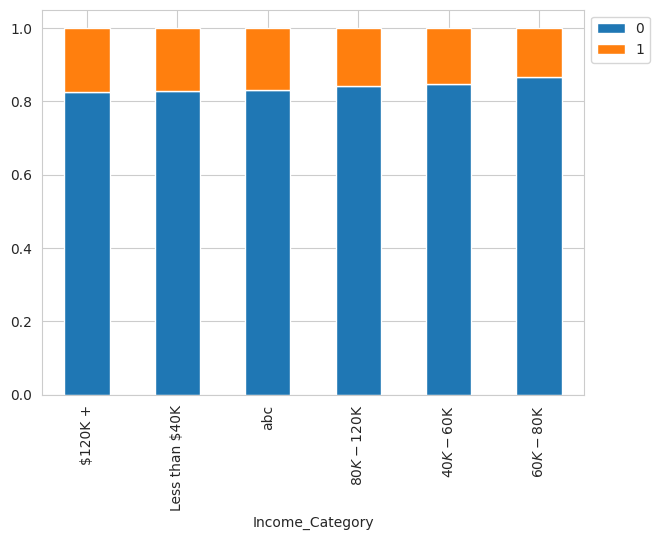

In [ ]:
# Stacked Barplot of Attrition_Flag vs Income_Category
stacked_barplot(df, "Income_Category", "Attrition_Flag");

`Attrition_Flag vs Contacts_Count_12_mon`

Attrition_Flag            0     1    All
Contacts_Count_12_mon                   
All                    8500  1627  10127
3                      2699   681   3380
2                      2824   403   3227
4                      1077   315   1392
1                      1391   108   1499
5                       117    59    176
6                         0    54     54
0                       392     7    399
------------------------------------------------------------------------------------------------------------------------


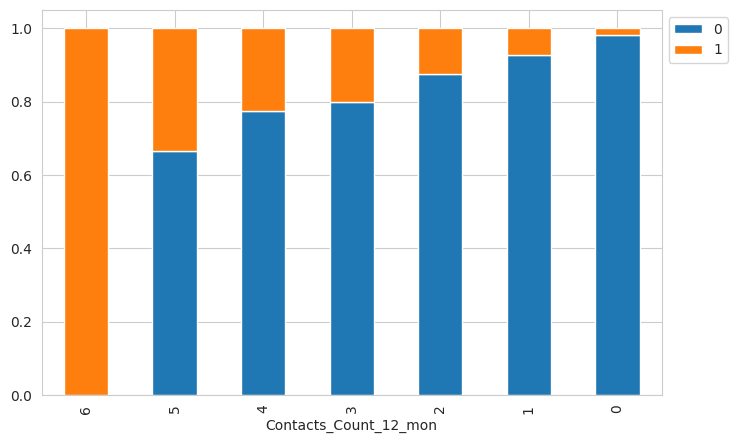

In [ ]:
# Stacked Barplot of Attrition_Flag vs Contact_Count_12_mon
stacked_barplot(df, "Contacts_Count_12_mon", "Attrition_Flag");

**Let's see the number of months a customer was inactive in the last 12 months (Months_Inactive_12_mon) vary by the customer's account status (Attrition_Flag)**

`Attrition_Flag vs Months_Inactive_12_mon`

Attrition_Flag             0     1    All
Months_Inactive_12_mon                   
All                     8500  1627  10127
3                       3020   826   3846
2                       2777   505   3282
4                        305   130    435
1                       2133   100   2233
5                        146    32    178
6                        105    19    124
0                         14    15     29
------------------------------------------------------------------------------------------------------------------------


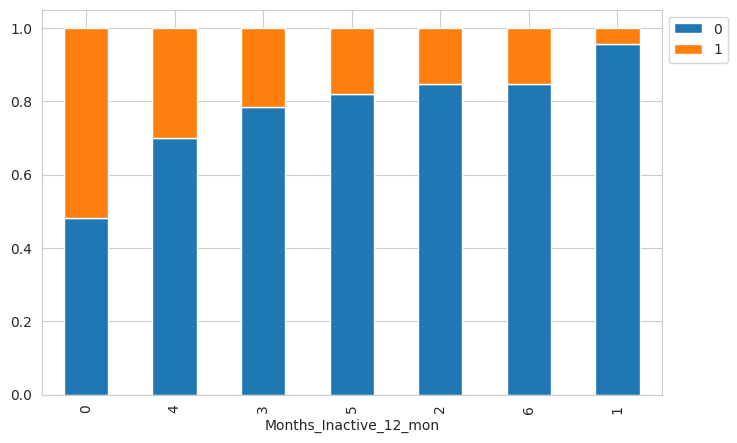

In [ ]:
# Stacked Barplot of Attrition_Flag vs Months_Inactive_12_mon
stacked_barplot(df, "Months_Inactive_12_mon", "Attrition_Flag");

`Attrition_Flag vs Total_Relationship_Count`

Attrition_Flag               0     1    All
Total_Relationship_Count                   
All                       8500  1627  10127
3                         1905   400   2305
2                          897   346   1243
1                          677   233    910
5                         1664   227   1891
4                         1687   225   1912
6                         1670   196   1866
------------------------------------------------------------------------------------------------------------------------


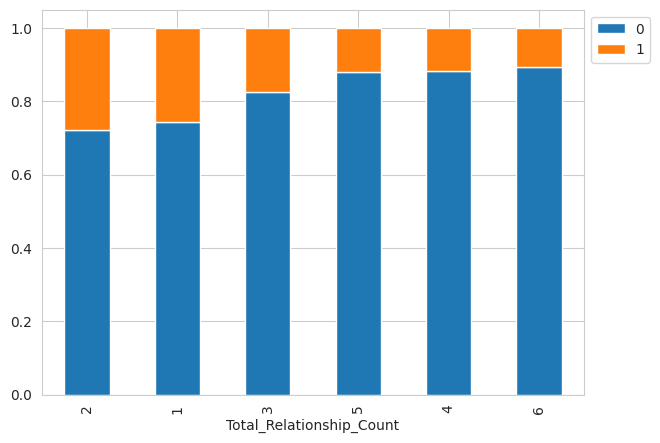

In [ ]:
# Stacked Barplot of Attrition_Flag vs Total_Relationship_Count
stacked_barplot(df, "Total_Relationship_Count", "Attrition_Flag");

`Attrition_Flag vs Dependent_count`

Attrition_Flag      0     1    All
Dependent_count                   
All              8500  1627  10127
3                2250   482   2732
2                2238   417   2655
1                1569   269   1838
4                1314   260   1574
0                 769   135    904
5                 360    64    424
------------------------------------------------------------------------------------------------------------------------


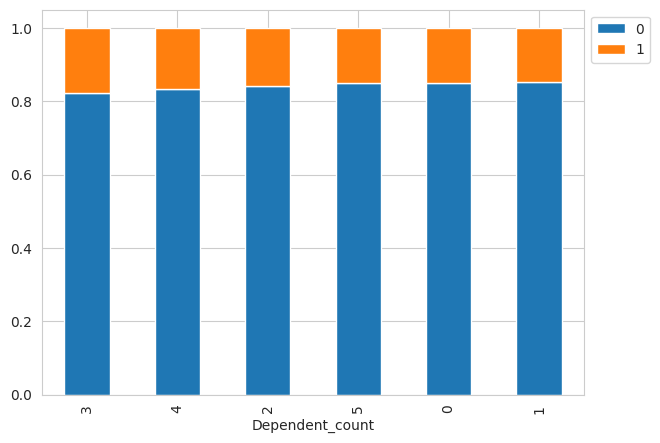

In [ ]:
# Stacked Barplot of Attrition_Flag vs Dependent_Count
stacked_barplot(df, "Dependent_count", "Attrition_Flag");

`Total_Revolving_Bal` vs `Attrition_Flag`

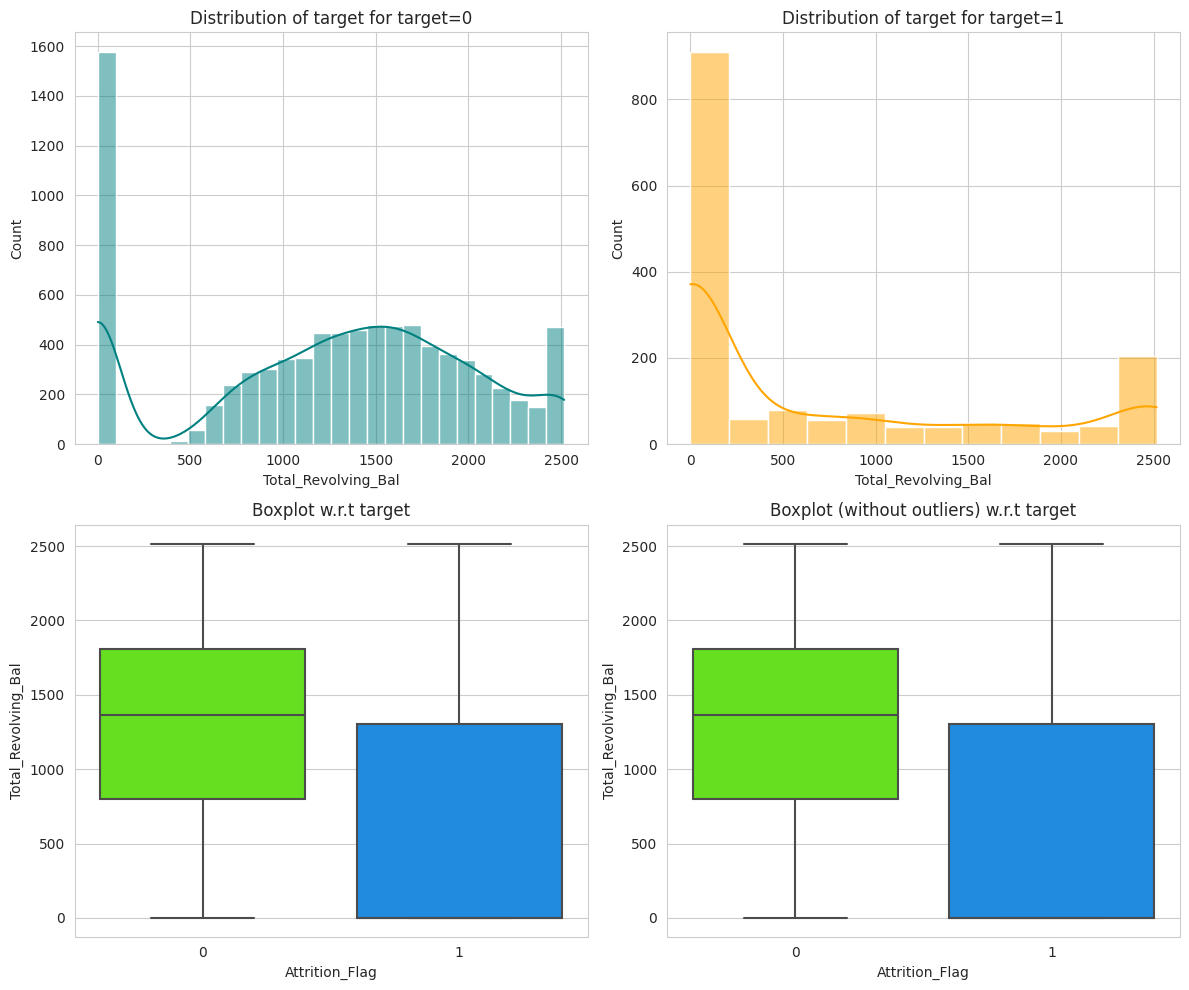

In [ ]:
# Distribution plot of Total_Revolving_Bal vs Attrition_Flag
distribution_plot_wrt_target(df, "Total_Revolving_Bal", "Attrition_Flag");

`Attrition_Flag vs Credit_Limit`

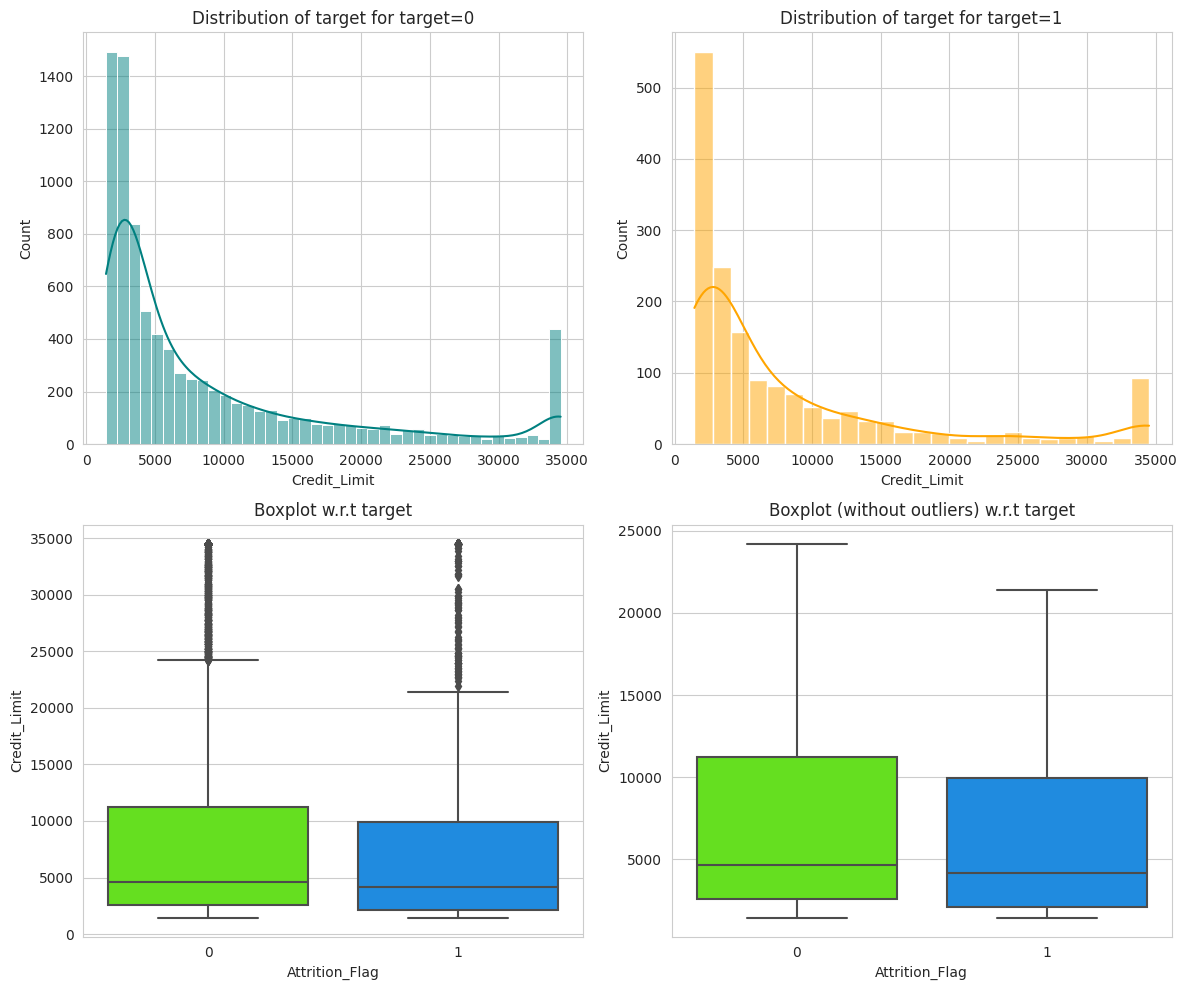

In [ ]:
# Distribution plot of Credit_Limit vs Attrition_Flag
distribution_plot_wrt_target(df, "Credit_Limit", "Attrition_Flag");

`Attrition_Flag vs Customer_Age`

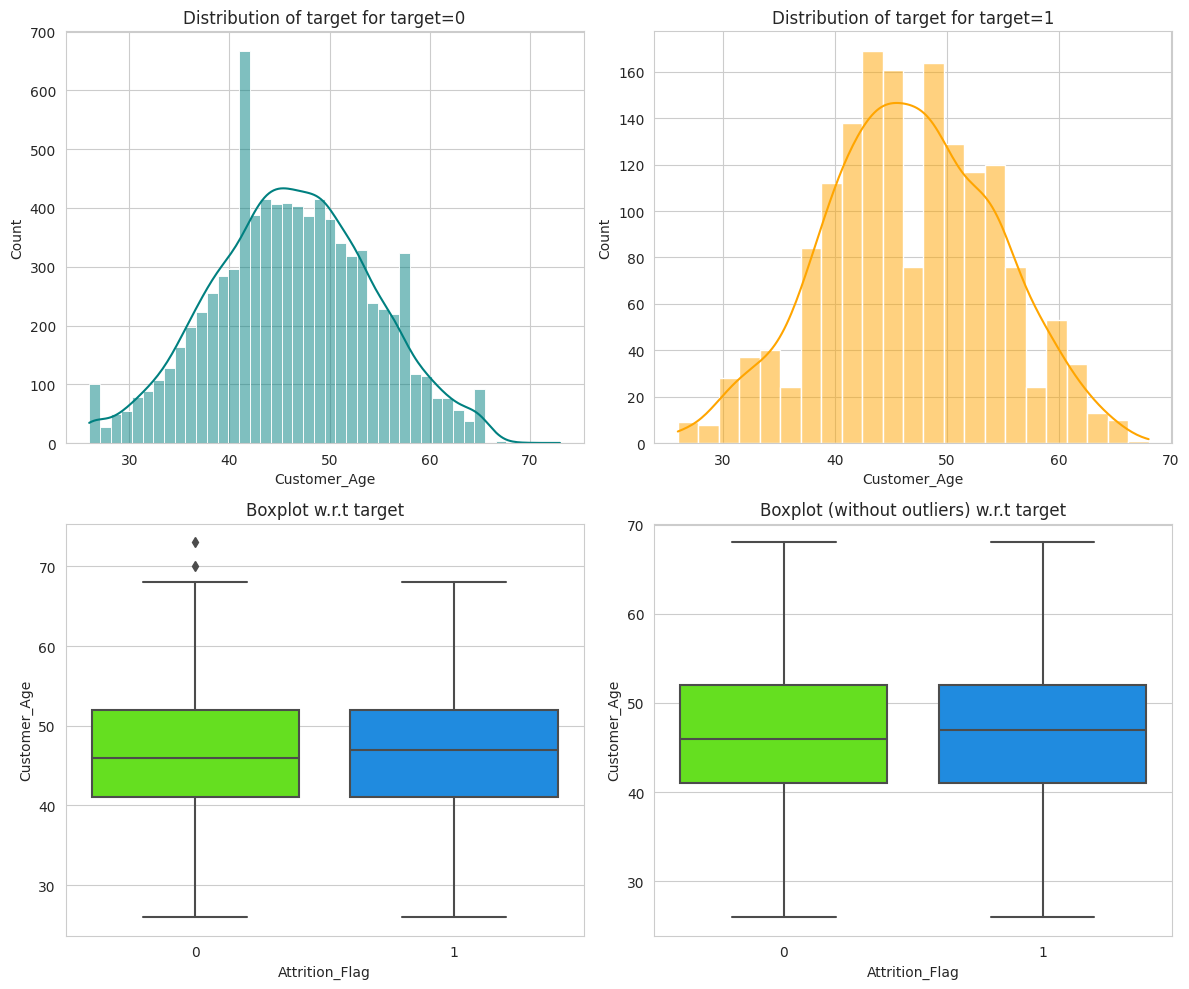

In [ ]:
# Distribution plot of Customer_Age vs Attrition_Flag
distribution_plot_wrt_target(df, "Customer_Age", "Attrition_Flag");

`Total_Trans_Ct` vs `Attrition_Flag`

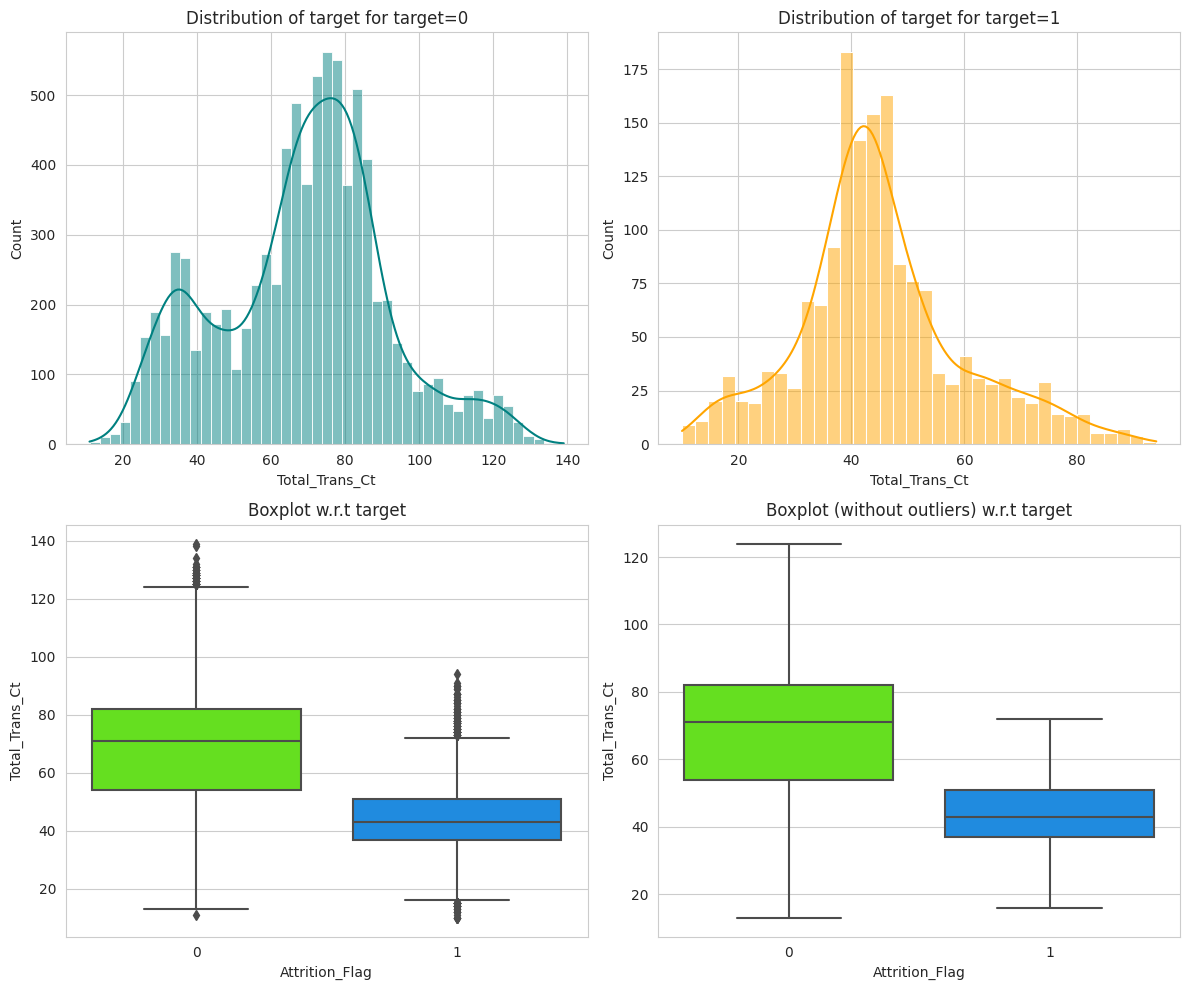

In [ ]:
# Distribution plot of Total_Trans vs Attrition_Flag
distribution_plot_wrt_target(df, "Total_Trans_Ct", "Attrition_Flag");

`Total_Trans_Amt` vs `Attrition_Flag`

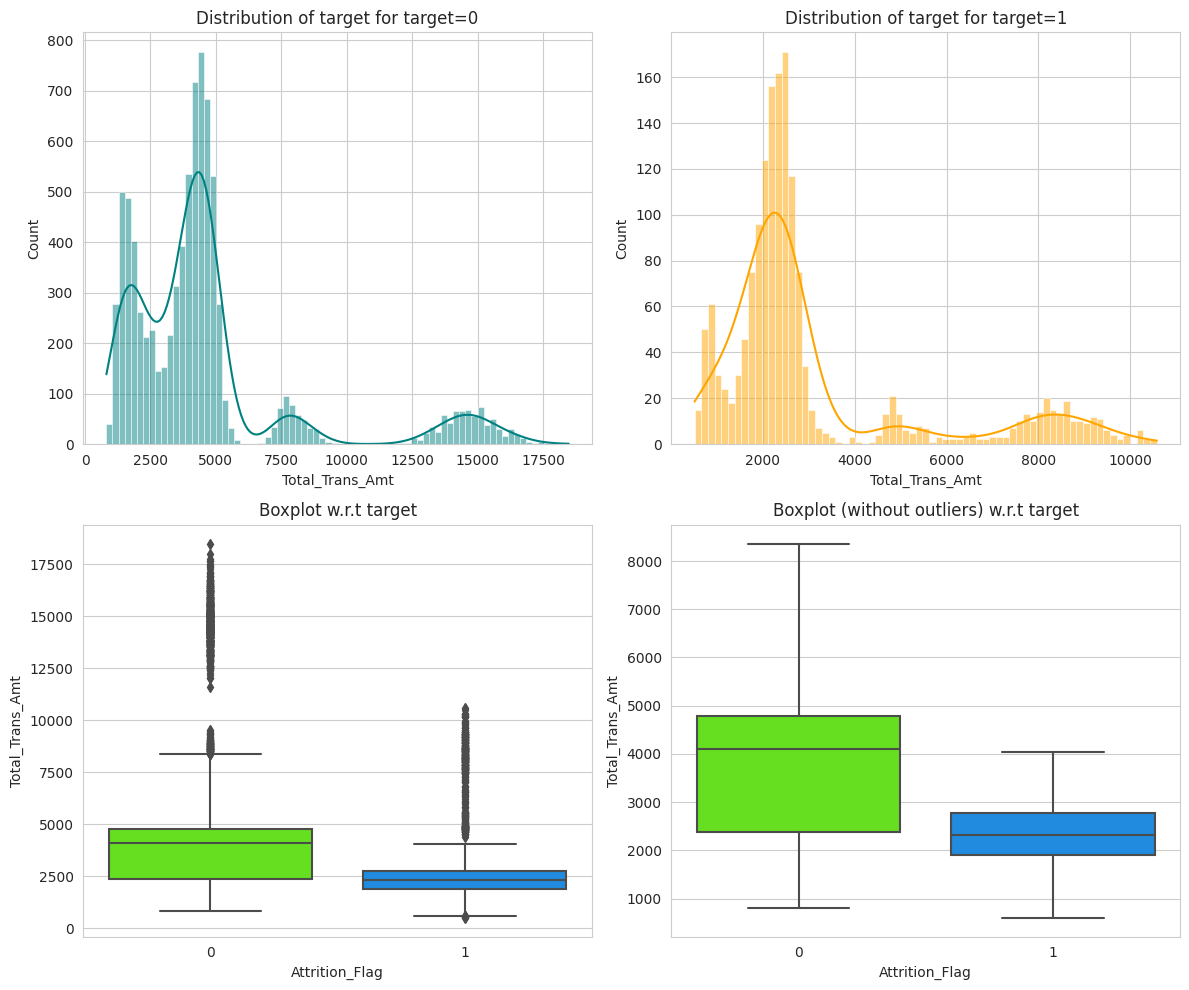

In [ ]:
# Distribution plot of Total_Trans_Amt vs Attrition_Flag
distribution_plot_wrt_target(df, "Total_Trans_Amt", "Attrition_Flag");

**Let's see the change in transaction amount between Q4 and Q1 (total_ct_change_Q4_Q1) vary by the customer's account status (Attrition_Flag)**

`Total_Ct_Chng_Q4_Q1` vs `Attrition_Flag`

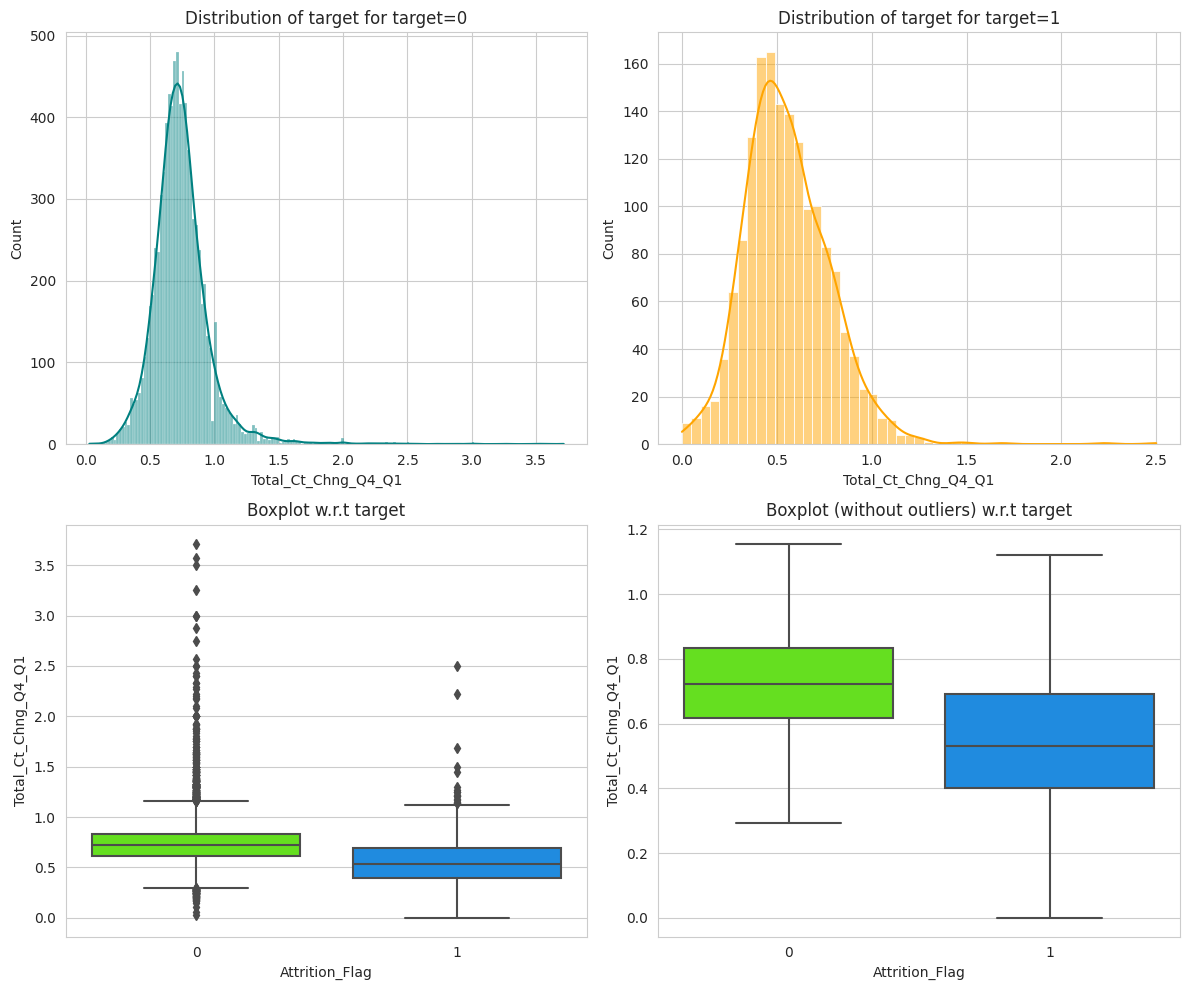

In [ ]:
# Distribution plot of Total_Ct_Chng_Q4_Q1 vs Attrition_Flag
distribution_plot_wrt_target(df, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag");

`Avg_Utilization_Ratio` vs `Attrition_Flag`

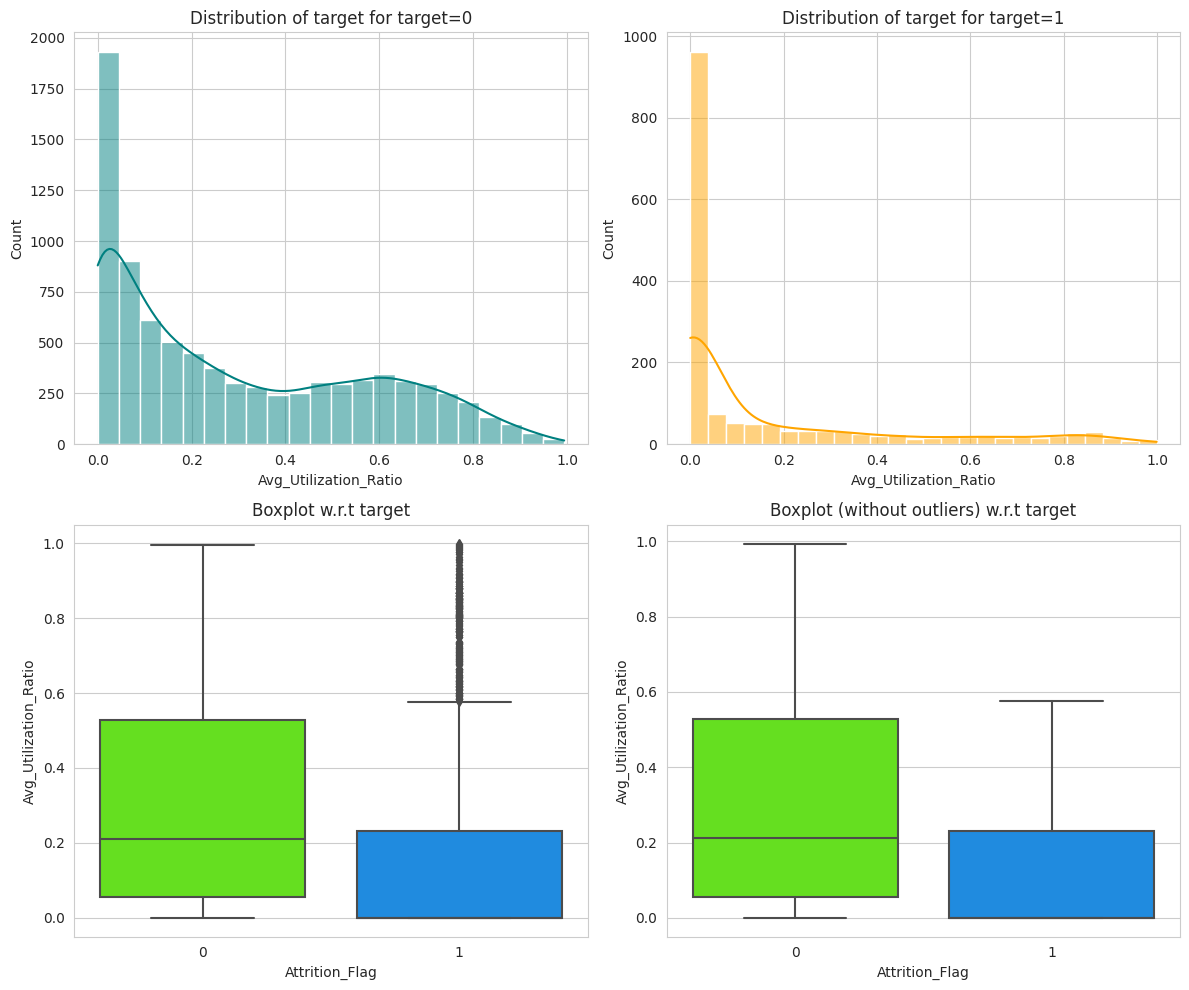

In [ ]:
# Distribution plot of Avg_Utilization_Ratio vs. Attrition_Flag
distribution_plot_wrt_target(df, "Avg_Utilization_Ratio", "Attrition_Flag");

`Attrition_Flag vs Months_on_book`

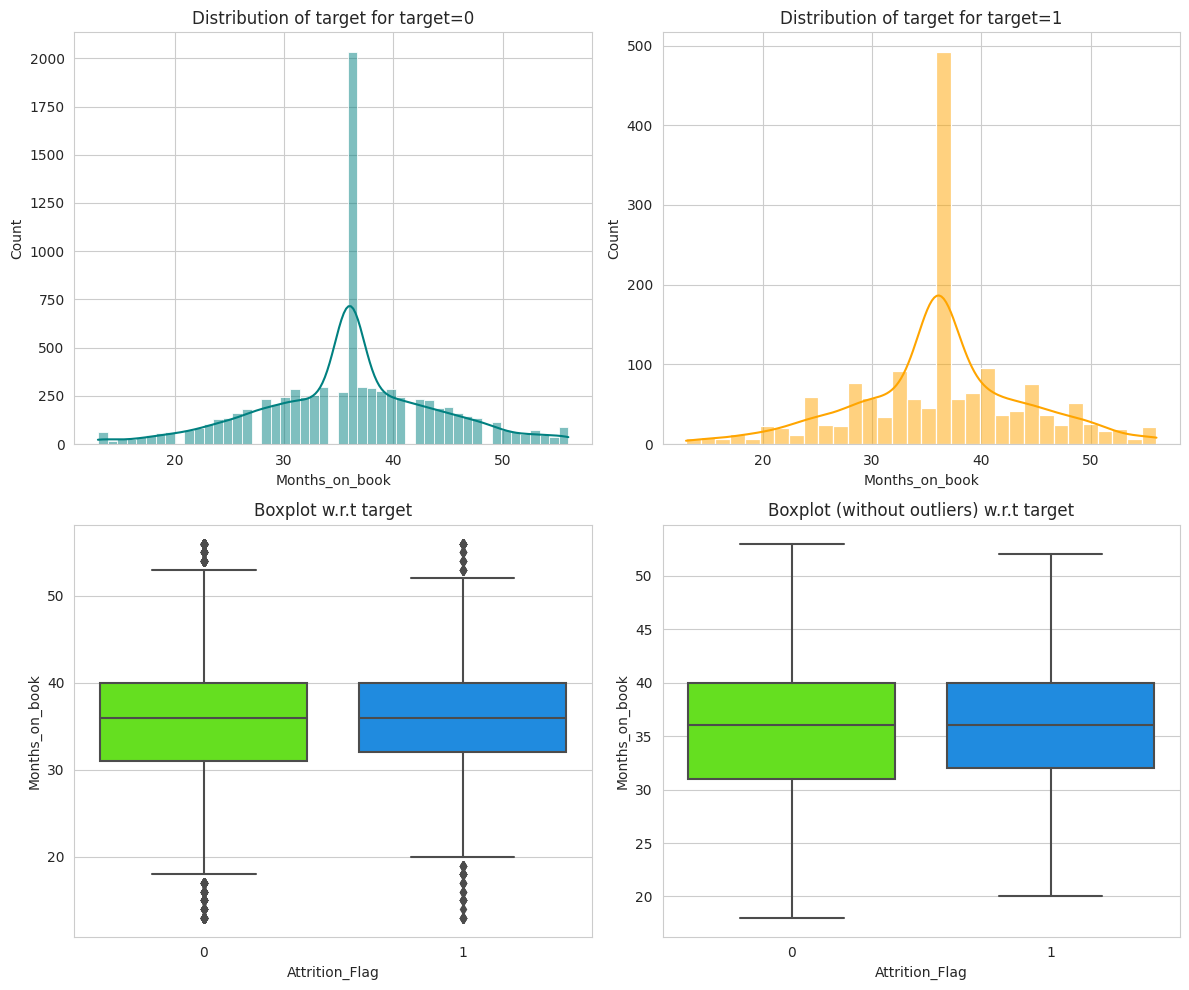

In [ ]:
# Dristribution plot with Months_on_book vs Attrition_Flag
distribution_plot_wrt_target(df, "Months_on_book", "Attrition_Flag");

`Attrition_Flag vs Total_Revolving_Bal`

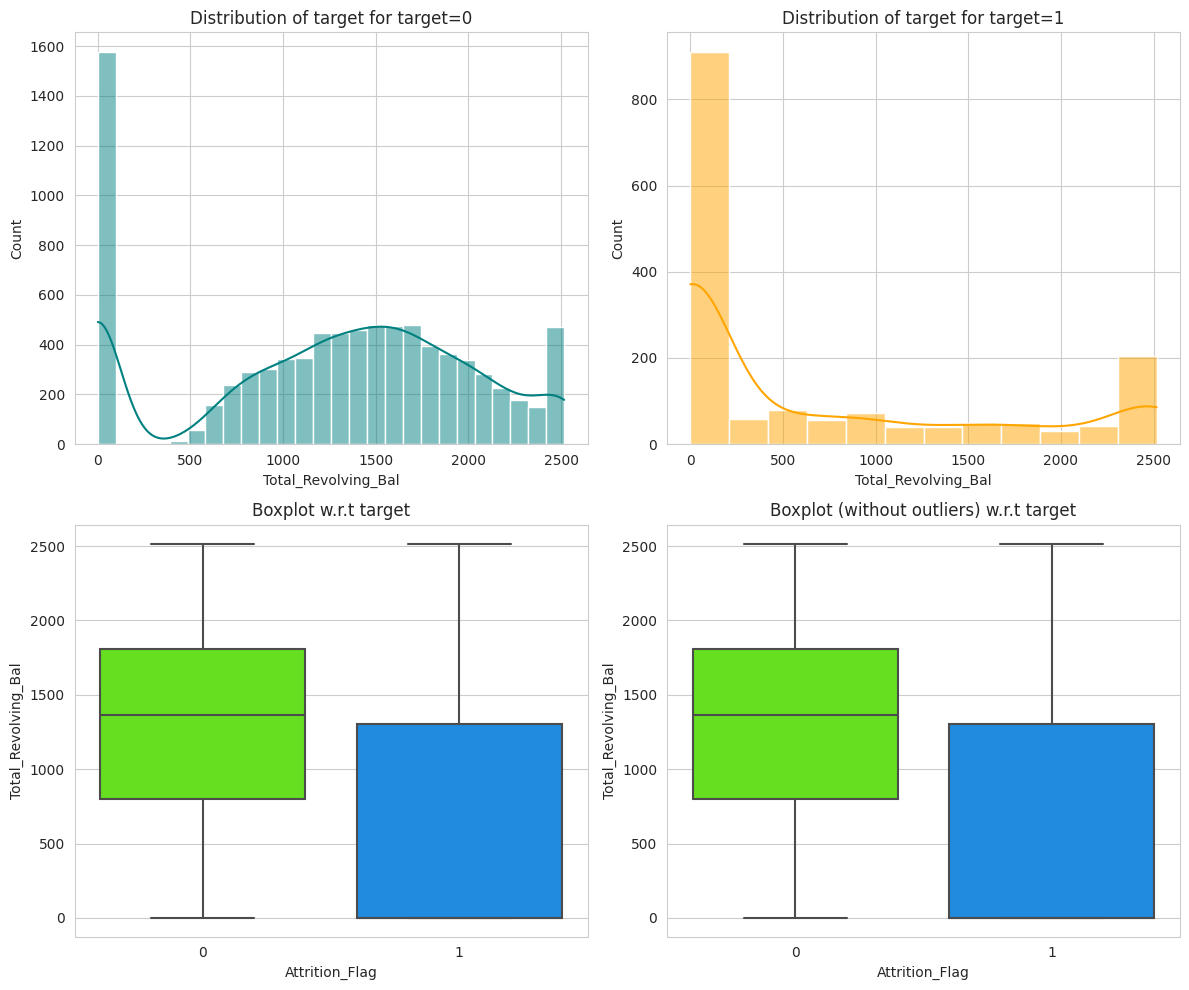

In [ ]:
# Distribution plot of Total_Revolving_Bal vs Attrition_Flag
distribution_plot_wrt_target(df, "Total_Revolving_Bal", "Attrition_Flag");

`Attrition_Flag vs Avg_Open_To_Buy`

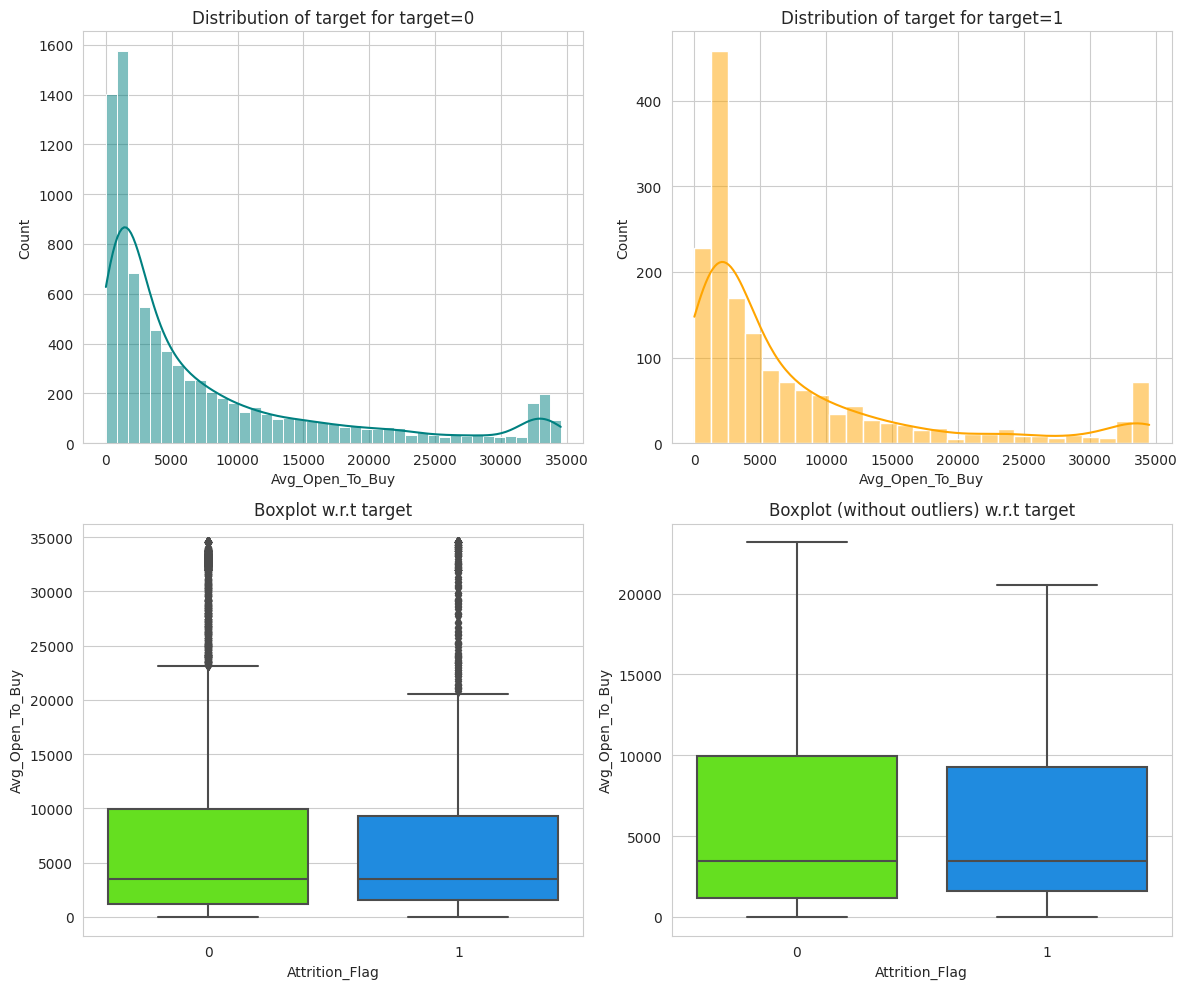

In [ ]:
# Distribution plot of Avg_Open_To_Buy vs Attrition_Flag
distribution_plot_wrt_target(df, "Avg_Open_To_Buy", "Attrition_Flag");

## Data Pre-processing

**Outlier Detection**

In [ ]:
# Outlier Detection on the 25th and 75th percentile
Q1 = df.quantile(0.25)  # To find the 25th percentile
Q3 = df.quantile(0.75)  # To find the 75th percentile

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)

In [ ]:
# checking the % outliers
((df.select_dtypes(include=["float64", "int64"]) < lower) | (df.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(df) * 100

Attrition_Flag             16.066
Customer_Age                0.020
Dependent_count             0.000
Months_on_book              3.812
Total_Relationship_Count    0.000
Months_Inactive_12_mon      3.268
Contacts_Count_12_mon       6.211
Credit_Limit                9.717
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             9.509
Total_Amt_Chng_Q4_Q1        3.910
Total_Trans_Amt             8.848
Total_Trans_Ct              0.020
Total_Ct_Chng_Q4_Q1         3.891
Avg_Utilization_Ratio       0.000
dtype: float64

### Train-Test Split

In [ ]:
# Replacing unkown nan to true
df["Income_Category"].replace("Unknown", np.nan, inplace=True)

In [ ]:
# Checking the missing values again
df.isna().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [ ]:
# creating an instace of the imputer to be used
imputer = SimpleImputer(strategy="most_frequent")

In [ ]:
# Dividing train data into X and y

X = df.drop(["Attrition_Flag"], axis=1)
y = df["Attrition_Flag"]

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'X' are your features and 'y' are your labels
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)

# Further split X_temp and y_temp into validation and test sets
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.30, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)

(7088, 19) (912, 19) (2127, 19)


## Missing value imputation




In [ ]:
# Required columns for imputation
reqd_col_for_impute = ["Education_Level", "Marital_Status", "Income_Category"]

In [ ]:
# Assuming imputer is an instance of SimpleImputer and reqd_col_for_impute is a list of column names

# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the validation data
X_val[reqd_col_for_impute] = imputer.transform(X_val[reqd_col_for_impute])

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])


In [ ]:
# Transform the validation data
X_val[reqd_col_for_impute] = imputer.transform(X_val[reqd_col_for_impute])

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])


In [ ]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

In [ ]:
# Analyze the distribution of categorical values to train
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

F    3740
M    3348
Name: Gender, dtype: int64
******************************
Graduate         3270
High School      1416
Uneducated       1029
College           716
Post-Graduate     352
Doctorate         305
Name: Education_Level, dtype: int64
******************************
Married     3795
Single      2756
Divorced     537
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2475
$40K - $60K       1277
$80K - $120K      1080
$60K - $80K        985
abc                764
$120K +            507
Name: Income_Category, dtype: int64
******************************
Blue        6616
Silver       378
Gold          81
Platinum      13
Name: Card_Category, dtype: int64
******************************


In [ ]:
# Analyze the distribution of categorical values to train
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

F    493
M    419
Name: Gender, dtype: int64
******************************
Graduate         428
High School      177
Uneducated       128
College           92
Post-Graduate     46
Doctorate         41
Name: Education_Level, dtype: int64
******************************
Married     509
Single      338
Divorced     65
Name: Marital_Status, dtype: int64
******************************
Less than $40K    318
$40K - $60K       164
$60K - $80K       132
$80K - $120K      116
abc               101
$120K +            81
Name: Income_Category, dtype: int64
******************************
Blue        838
Silver       61
Gold         11
Platinum      2
Name: Card_Category, dtype: int64
******************************


In [ ]:
# Analyze the distribution of categorical values to train
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

F    3740
M    3348
Name: Gender, dtype: int64
******************************
Graduate         3270
High School      1416
Uneducated       1029
College           716
Post-Graduate     352
Doctorate         305
Name: Education_Level, dtype: int64
******************************
Married     3795
Single      2756
Divorced     537
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2475
$40K - $60K       1277
$80K - $120K      1080
$60K - $80K        985
abc                764
$120K +            507
Name: Income_Category, dtype: int64
******************************
Blue        6616
Silver       378
Gold          81
Platinum      13
Name: Card_Category, dtype: int64
******************************


**Encoding The Variables**

In [ ]:
# Setting up the dummies varibles
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure that all the column names are in the same order across the datasets
X_val = X_val.reindex(columns = X_train.columns, fill_value=0)
X_test = X_test.reindex(columns = X_train.columns, fill_value=0)

print(X_train.shape, X_val.shape, X_test.shape)

(7088, 30) (912, 30) (2127, 30)


* After encoding there are 29 columns.

In [ ]:
# check the top 5 rows from the train dataset
X_train.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_abc,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
415,49,2,38,3,2,0,8077.000,1965,6112.000,0.637,1329,26,0.444,0.243,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0
3749,61,0,51,4,2,2,8476.000,0,8476.000,0.675,3889,67,0.489,0.000,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
9295,27,0,19,1,1,3,34516.000,1131,33385.000,0.715,14716,112,0.750,0.033,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
8290,52,1,36,1,1,3,3040.000,2517,523.000,0.774,4608,61,1.033,0.828,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
7672,44,3,36,2,3,3,2228.000,0,2228.000,0.686,2523,45,0.607,0.000,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0


## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

### Model Building with original data

Sample code for model building with original data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9770114942528736
Random forest: 1.0
Decision Tree: 1.0
AdaBoost: 0.8691423519009726
Gradient Boosting: 0.8894783377541998
XGBoost: 1.0

Validation Performance:

Bagging: 0.8181818181818182
Random forest: 0.7662337662337663
Decision Tree: 0.7922077922077922
AdaBoost: 0.8246753246753247
Gradient Boosting: 0.8701298701298701
XGBoost: 0.8766233766233766


### Model Building with Oversampled data


In [ ]:
from imblearn.over_sampling import SMOTE

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=7, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [ ]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=7, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [ ]:
# Print of Oversampling Counts and shape
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 1131
Before Oversampling, counts of label 'No': 5957 

After Oversampling, counts of label 'Yes': 5957
After Oversampling, counts of label 'No': 5957 

After Oversampling, the shape of train_X: (11914, 30)
After Oversampling, the shape of train_y: (11914,) 



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=2)))
models.append(("Random forest", RandomForestClassifier(random_state=2)))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=2)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=2)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=2)))
models.append(("XGBoost", XGBClassifier(random_state=2)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))  # Using oversampled data
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")
for name, model in models:
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))



Training Performance:

Bagging: 0.9974819540036931
Random forest: 1.0
Decision Tree: 1.0
AdaBoost: 0.9691119691119691
Gradient Boosting: 0.9786805438979352
XGBoost: 1.0

Validation Performance:

Bagging: 0.8701298701298701
Random forest: 0.8246753246753247
Decision Tree: 0.8246753246753247
AdaBoost: 0.8831168831168831
Gradient Boosting: 0.9155844155844156
XGBoost: 0.9090909090909091


### Model Building with Undersampled data

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
# Print of the Under sampling counts and shape
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 1131
Before Under Sampling, counts of label 'No': 5957 

After Under Sampling, counts of label 'Yes': 1131
After Under Sampling, counts of label 'No': 1131 

After Under Sampling, the shape of train_X: (2262, 30)
After Under Sampling, the shape of train_y: (2262,) 



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import recall_score

models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))  # Using undersampled data
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")
for name, model in models:
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9920424403183024
Random forest: 1.0
Decision Tree: 1.0
AdaBoost: 0.9557913351016799
Gradient Boosting: 0.9805481874447391
XGBoost: 1.0

Validation Performance:

Bagging: 0.9025974025974026
Random forest: 0.9155844155844156
Decision Tree: 0.8766233766233766
AdaBoost: 0.9155844155844156
Gradient Boosting: 0.961038961038961
XGBoost: 0.961038961038961


### HyperparameterTuning

#### Tuning AdaBoost using original data

In [ ]:
%%time

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import numpy as np

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs=-1, n_iter=60, scoring=scorer, cv=6, random_state=1)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)  # Fit the model on original data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_, randomized_cv.best_score_))


Best parameters are {'n_estimators': 90, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.8815621599309543:
CPU times: user 6.87 s, sys: 674 ms, total: 7.55 s
Wall time: 5min 55s


In [ ]:
# Creating new pipeline with best parameters
tuned_ada2 = AdaBoostClassifier(random_state=1,
    n_estimators=50, learning_rate=0.1, base_estimator=DecisionTreeClassifier(max_depth=1, random_state=1))

# Fit the model on undersampled data
tuned_ada2.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, random_state=1)

In [ ]:
# Creating new pipeline with best parameters
tuned_ada2 = AdaBoostClassifier(random_state=1,
                                n_estimators=50,
                                learning_rate=0.1,
                                base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1))

# Fit the model on undersampled data
tuned_ada2.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=0.1, random_state=1)

In [ ]:
# Making predictions on the training set
y_train_pred = tuned_ada2.predict(X_train_un)

# Calculating recall score
adb2_train = recall_score(y_train_un, y_train_pred)
adb2_train

0.9575596816976127

In [ ]:
# Making predictions on the validation set
y_val_pred = tuned_ada2.predict(X_val)

# Calculating recall score on the validation set
adb2_val = recall_score(y_val, y_val_pred)
adb2_val

0.922077922077922

In [ ]:
# Making predictions on the test set
y_test_pred = tuned_ada2.predict(X_test)

# Calculating recall score on the test set
adb2_test_recall = recall_score(y_test, y_test_pred)
adb2_test_recall

0.9502923976608187

#### Tuning Gradient Boosting using undersampled data

In [ ]:
%%time

from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import numpy as np

# Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1), DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75, 150, 25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample": [0.5, 0.7, 1],
    "max_features": [0.5, 0.7, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=4, random_state=1, n_jobs=-1)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)  # Fit the model on undersampled data

print("Best parameters are {} with CV score={}:".format(randomized_cv.best_params_, randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9513883667894645:
CPU times: user 2.15 s, sys: 142 ms, total: 2.29 s
Wall time: 1min 17s


In [ ]:
# Creating new pipeline with best parameters
tuned_gbm1 = GradientBoostingClassifier(
    max_features=0.3,
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    learning_rate=0.1,
    n_estimators=90,
    subsample=0.1,
)

tuned_gbm1.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.3, n_estimators=90, random_state=1,
                           subsample=0.1)

In [ ]:
# Making predictions on the oversampled training set
y_train_pred = tuned_gbm1.predict(X_train_un)

# Calculating recall score on the oversampled training set
gbm1_train = recall_score(y_train_un, y_train_pred)
gbm1_train

0.9584438549955792

In [ ]:
# Making predictions on the validation set
y_val_pred = tuned_gbm1.predict(X_val)

# Calculating recall score on the validation set
gbm1_val = recall_score(y_val, y_val_pred)
gbm1_val

0.9285714285714286

In [ ]:
# Making predictions on the test set
y_test_pred = tuned_gbm1.predict(X_test)

# Calculating recall score on the test set
gbm1_test_recall = recall_score(y_test, y_test_pred)
gbm1_test_recall

0.9502923976608187

#### Tuning Gradient Boosting using original data

In [ ]:
%%time

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)  # Use the oversampled data for training

# Printing the best parameters and the corresponding score
print("Best parameters are {} with CV score={}:".format(randomized_cv.best_params_, randomized_cv.best_score_))

Best parameters are {'subsample': 0.5, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.05, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9551744110050888:
CPU times: user 5.72 s, sys: 480 ms, total: 6.2 s
Wall time: 4min 59s


In [ ]:
# Creating new pipeline with best parameters
tuned_gbm2 = GradientBoostingClassifier(
    max_features=0.6,
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    learning_rate=0.3,
    n_estimators=110,
    subsample=0.7,
)

tuned_gbm2.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.3, max_features=0.6,
                           n_estimators=110, random_state=1, subsample=0.7)

In [ ]:
# Making predictions on the oversampled training set
y_train_pred = tuned_gbm2.predict(X_train_over)

# Calculating recall score on the oversampled training set
gbm2_train = recall_score(y_train_over, y_train_pred)
gbm2_train

0.9375524592915897

In [ ]:
# Making predictions on the validation set
y_val_pred = tuned_gbm2.predict(X_val)

# Calculating recall score on the validation set
gbm2_val = recall_score(y_val, y_val_pred)
gbm2_val

0.9155844155844156

In [ ]:
# Making predictions on the test set
y_test_pred = tuned_gbm2.predict(X_test)

# Calculating recall score on the test set
gbm2_test_recall = recall_score(y_test, y_test_pred)
gbm2_test_recall

0.8713450292397661

#### Tuning XGBoost Model with Original data


In [ ]:
%%time

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)  # Use the oversampled data for training

# Printing the best parameters and the corresponding score
print("Best parameters are {} with CV score={}:"
      .format(randomized_cv.best_params_, randomized_cv.best_score_))

Best parameters are {'subsample': 0.5, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.05, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9551744110050888:
CPU times: user 5.83 s, sys: 559 ms, total: 6.39 s
Wall time: 5min 16s


In [ ]:
# Tuning the XGBBoost Classifier
tuned_xgb = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.8,
    scale_pos_weight=2,
    n_estimators=90,
    learning_rate=0.2,
    gamma=2,
)

tuned_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=2, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=90,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
# Making predictions on the training set
y_train_pred = tuned_xgb.predict(X_train)

# Calculating recall score on the training set
xgb_train = recall_score(y_train, y_train_pred)
xgb_train

0.9946949602122016

In [ ]:
# Making predictions on the validation set
y_val_pred = tuned_xgb.predict(X_val)

# Calculating recall score on the validation set
xgb_val = recall_score(y_val, y_val_pred)
xgb_val

0.9285714285714286

## Model Comparison and Final Model Selection

In [ ]:
# Training performance comparison
models_train_comp_df = pd.DataFrame({
    "Gradient boosting trained with Undersampled data": [gbm1_train],
    "Gradient boosting trained with Original data": [gbm2_train],
    "AdaBoost trained with Undersampled data": [adb2_train],
}, index=["Recall Score"])

print("Training performance comparison:")
print(models_train_comp_df)


Training performance comparison:
              Gradient boosting trained with Undersampled data  \
Recall Score                                             0.958   

              Gradient boosting trained with Original data  \
Recall Score                                         0.938   

              AdaBoost trained with Undersampled data  
Recall Score                                    0.958  


In [ ]:
# Validation performance comparison
models_val_comp_df = pd.DataFrame({
    "Gradient boosting trained with Undersampled data": [gbm1_val],
    "Gradient boosting trained with Original data": [gbm2_val],
    "AdaBoost trained with Undersampled data": [adb2_val],
    "XGBoost trained with Original data": [xgb_val],
}, index=["Recall Score"])

print("Validation performance comparison:")
print(models_val_comp_df)


Validation performance comparison:
              Gradient boosting trained with Undersampled data  \
Recall Score                                             0.929   

              Gradient boosting trained with Original data  \
Recall Score                                         0.916   

              AdaBoost trained with Undersampled data  \
Recall Score                                    0.922   

              XGBoost trained with Original data  
Recall Score                               0.929  


**The final model, let's find out how our final model is performing on unseen test data.**

In [ ]:
# Making predictions on the test set
y_test_pred = tuned_xgb.predict(X_test)

# Calculating recall score on the test set
xgb_test_recall = recall_score(y_test, y_test_pred)
xgb_test_recall

0.9152046783625731

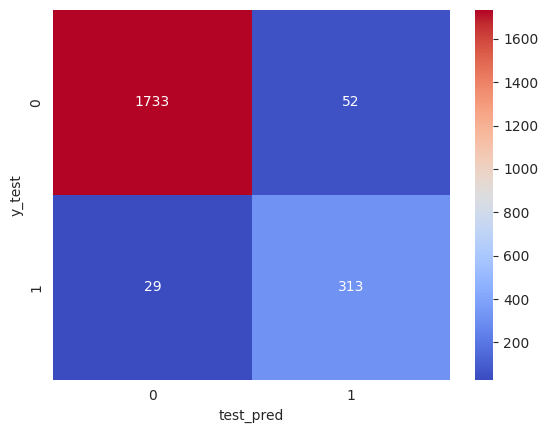

In [ ]:
from sklearn.metrics import confusion_matrix

#Confusion Matrix for actual and predicted
y_true = y_test
y_pred = y_test_pred
# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using Seaborn
sns.heatmap(cm, cmap='coolwarm', annot=True, fmt="d")
plt.ylabel('y_test')
plt.xlabel('test_pred')
plt.show();

### Feature Importances

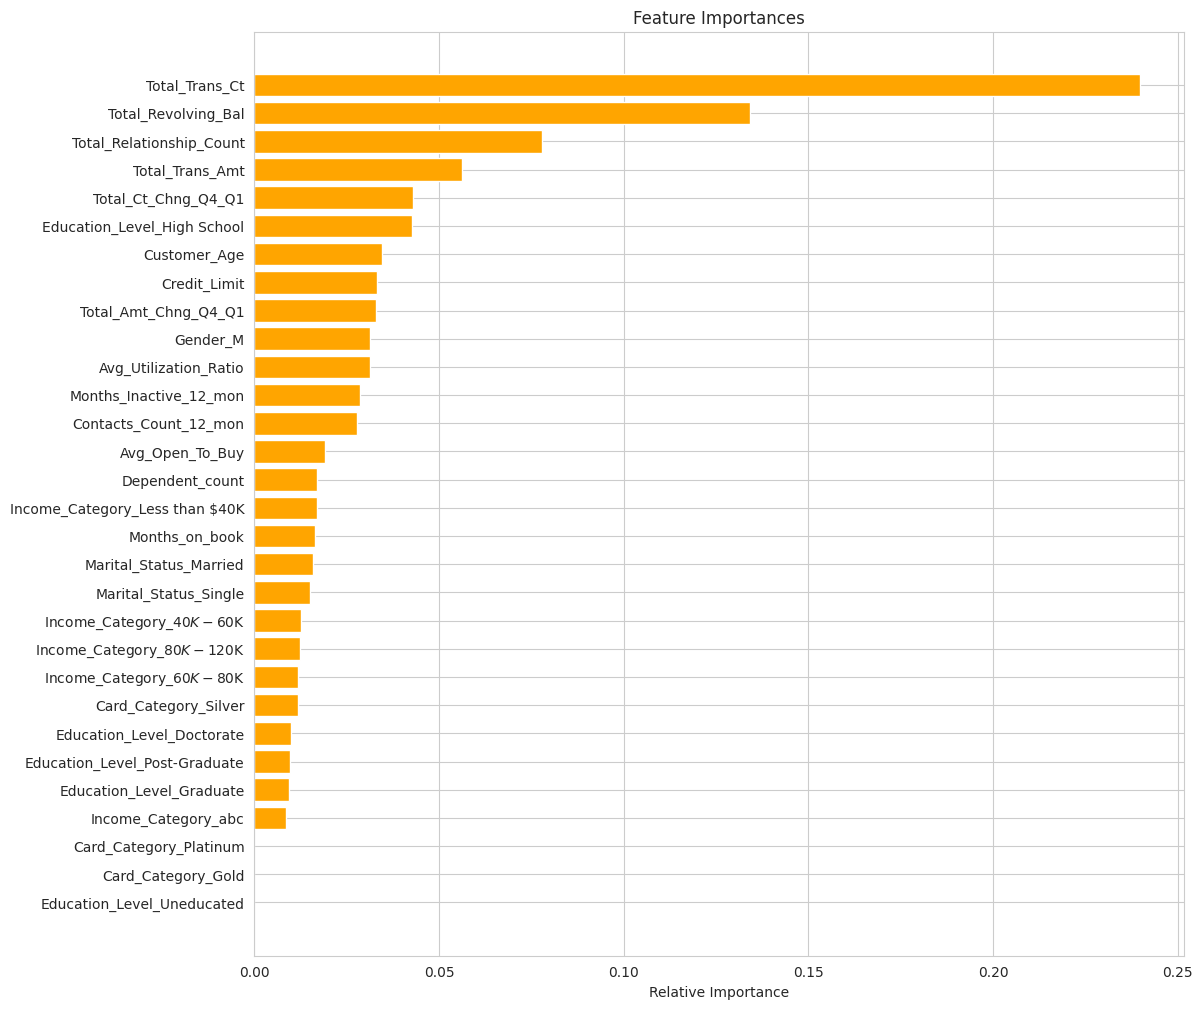

In [ ]:
# Retrieve feature importances from the model
feature_names = X_train.columns
importances = tuned_xgb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="orange", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show();

In [ ]:
# Results Summary

data = {
    "Model": [
        "Gradient Boosting (Undersampled Data)",
        "Gradient Boosting (Original Data)",
        "AdaBoost (Undersampled Data)",
        "XGBoost (Original Data)"
    ],
    "Recall (Training)": [
        gbm1_train,
        gbm2_train,
        adb2_train,
        xgb_train
    ],
    "Recall (Validation)": [
        gbm1_val,
        gbm2_val,
        adb2_val,
        xgb_val
    ],
    "Recall (Test)": [
        gbm1_test_recall,
        gbm2_test_recall,
        adb2_test_recall,
        xgb_test_recall
    ]
}

performance_df = pd.DataFrame(data)
performance_df

,Model,Recall (Training),Recall (Validation),Recall (Test)
0,Gradient Boosting (Undersampled Data),0.958,0.929,0.950
1,Gradient Boosting (Original Data),0.938,0.916,0.871
2,AdaBoost (Undersampled Data),0.958,0.922,0.950
3,XGBoost (Original Data),0.995,0.929,0.915


# Business Insights and Conclusions

To provide business insights and potential solutions based on the analysis of a dataset, especially in the context of customer churn for a bank, it's important to first understand the data and the results of any modeling or analysis performed. Total_Trans_Ct and Total_Revolving_Bal have the highest feature performance. Customers_Age and Months_on_book have a high correlation. Credit_Limit, Averge_Open_to_Buy, and Total_Revolving_Balance is the second highest correlation grouping.

### 1. Understand the Key Drivers of Churn:
Analyze the features that are most important in predicting churn, as identified by your machine learning models.

- If features related to customer service (e.g., number of complaints, response time) are important, this indicates that improving customer service could reduce churn.
- If features related to product usage (e.g., frequency of use, specific product features used) are important, this might indicate a need for product improvement or better customer education.

### 2. Segment the Customers:
Identify specific customer segments that are more likely to churn.

- Use clustering techniques or decision tree outputs to identify characteristics of high-risk customers.
- Tailor specific strategies to address the needs and concerns of these segments.

### 3. Develop Retention Strategies:
Based on your understanding of the key drivers and high-risk segments, develop targeted customer retention strategies.

- If customer service is an issue, invest in training for customer service representatives, implement faster response times, or establish a customer feedback loop.
- If product usage is linked to churn, consider product improvements, personalized customer education campaigns, or incentives for using certain features.

### 4. Implement Proactive Engagement:
Engage with customers before they churn.

- Set up automated alerts for when a customer exhibits signs of potential churn.
- Initiate proactive outreach to address any issues and improve the customer experience.

### 5. Evaluate and Iterate:
Continuously evaluate the effectiveness of your retention strategies and make adjustments as needed.

- Set up KPIs (Key Performance Indicators) to measure the success of your retention strategies.
- Regularly review the performance of your models and update them as necessary.

### 6. Foster Customer Loyalty:
Implement programs to build stronger relationships with your customers, making them less likely to churn.

- Establish loyalty programs, customer appreciation events, or personalized offers.
- Encourage customer feedback and show that the bank is acting on that feedback.

### Business Insights:

- **Customer Satisfaction:** High levels of churn might indicate low customer satisfaction. Understanding specific pain points can guide improvements.
- **Product Fit:** If certain products or services have higher churn rates, this might indicate a mismatch between customer needs and product offerings.
- **Competitive Landscape:** High churn rates might also indicate that competitors are offering more attractive alternatives.

### Solutions:

- **Improve Customer Service:** Implement training programs, establish a feedback loop, and reduce response times.
- **Enhance Product Offerings:** Regularly update products/services based on customer needs and feedback.
- **Implement Targeted Communication:** Use personalized communication to address potential issues before they lead to churn.
- **Foster Loyalty:** Establish loyalty programs and incentives to increase customer stickiness.



***